## **Problem Description**

**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

### Data Description

**Attribute Information**

**InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with
letter 'c', it indicates a cancellation**

**StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product**

**Description: Product (item) name. Nominal**

**Quantity: The quantities of each product (item) per transaction.Numeric**

**InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated**

**UnitPrice: Unit price. Numeric, Product price per unit in sterling**

**CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer**

**Country: Country name. Nominal, the name of the country where each customer resides**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Overwiev of data

In [2]:
# Viewing the data of top 5 rows to take a glimps of the data
df=pd.read_excel('Online Retail.xlsx')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
# Viewing the data of bottom 5 rows to take a glimps of the data
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
## cheching the unique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
## Checking duplicated data
df.duplicated().sum()

5268

In [8]:
df[df.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

In [9]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

### Features description

**InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with
letter 'c', it indicates a cancellation.**

**StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**

**Description: Product (item) name. Nominal.**

**Quantity: The quantities of each product (item) per transaction. Numeric.**

**InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.**

**UnitPrice: Unit price. Numeric, Product price per unit in sterling.**

**CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**

**Country: Country name. Nominal, the name of the country where each customer resides.**


## Preprocessing the dataset

**Why do we need to handle missing values?**

**The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
missing=df.isnull().sum()

In [12]:
miss_values=(missing/len(df)*100).reset_index(name='counts')
miss_values

index     counts
0    InvoiceNo   0.000000
1    StockCode   0.000000
2  Description   0.268311
3     Quantity   0.000000
4  InvoiceDate   0.000000
5    UnitPrice   0.000000
6   CustomerID  24.926694
7      Country   0.000000

<AxesSubplot:xlabel='feature', ylabel='counts'>

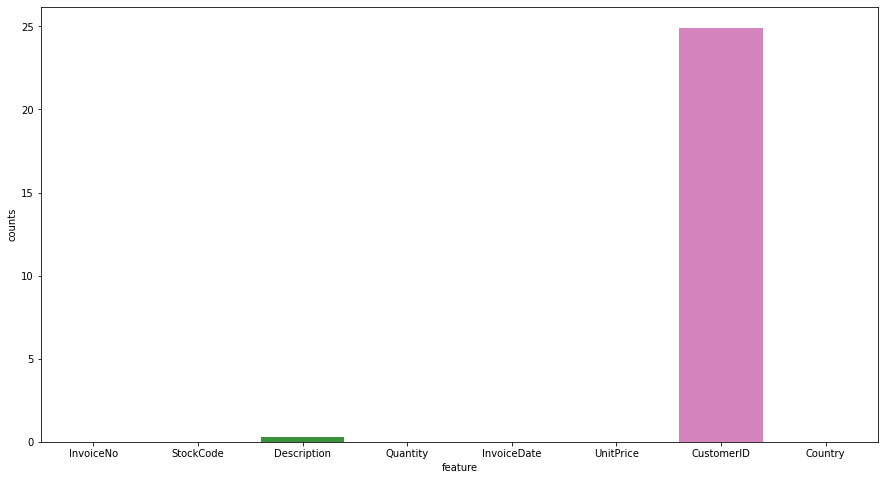

In [13]:
miss_values=miss_values.rename(columns={'index':'feature'})
plt.figure(figsize=(15,8))
sns.barplot(x='feature',y='counts',data=miss_values)

<AxesSubplot:>

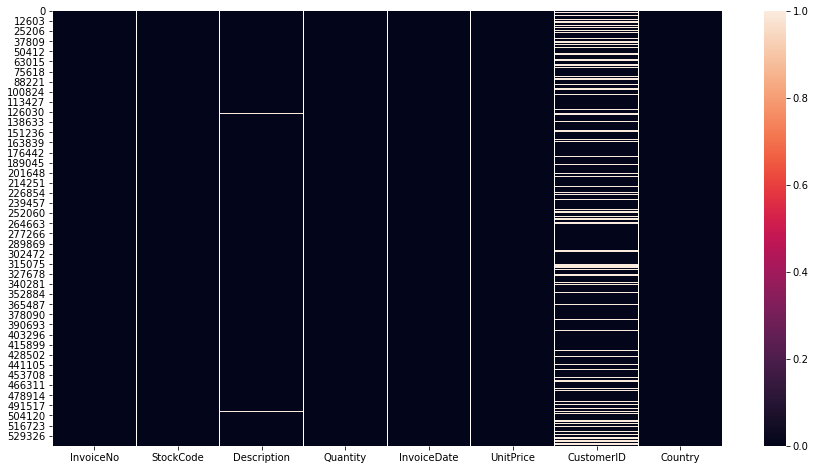

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

**From above analysis there missing values are present in data sets variable Description at high amount of im CustomerId variable aprox 24%**

In [15]:
df[df.isnull().any(axis=1)]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [16]:
df.dropna(inplace=True)


**There is some null value present in our dataset like in CustomerID and Description**

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<AxesSubplot:>

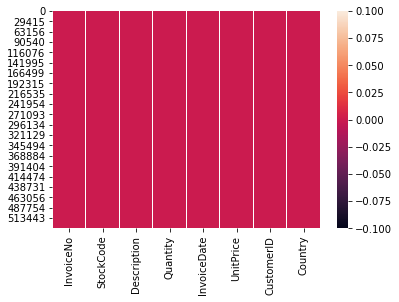

In [18]:
sns.heatmap(df.isnull())

**After removeing null value in our dataset .it reduces to (406829, 8)**

### Duplicate values

In [19]:
df.duplicated().sum()

5225

In [20]:
df.drop_duplicates(inplace=True)


### we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [21]:
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [22]:
df[df['InvoiceNo'].str.contains("C")]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [23]:
df=df[~df['InvoiceNo'].str.contains("C")]
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[392732 rows x 8 columns]

### convert invoice Data column into 'year','month','day','hour','minute','second'

In [24]:
import datetime as dt

In [25]:
df['InvoiceDate_year']=df['InvoiceDate'].dt.year
df['InvoiceDate_day']=df['InvoiceDate'].dt.day
df['InvoiceDate_month']=df['InvoiceDate'].dt.month
df['InvoiceDate_hour']=df['InvoiceDate'].dt.hour
df['InvoiceDate_minunts']=df['InvoiceDate'].dt.minute

In [26]:
pd.DataFrame(df.dtypes)

0
InvoiceNo                    object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
UnitPrice                   float64
CustomerID                  float64
Country                      object
InvoiceDate_year              int64
InvoiceDate_day               int64
InvoiceDate_month             int64
InvoiceDate_hour              int64
InvoiceDate_minunts           int64

### Exploratory Data Analysis

**Total number of customers**

In [27]:
df['CustomerID'].nunique()

4339

**Top active customers**

In [28]:
top_10_cus=df['CustomerID'].value_counts().head(5).reset_index(name='Counts')
top_10_cus=top_10_cus.rename(columns={'index':'customers'})
top_10_cus.sort_values(ascending=False,by='Counts')

customers  Counts
0    17841.0    7676
1    14911.0    5672
2    14096.0    5111
3    12748.0    4413
4    14606.0    2677

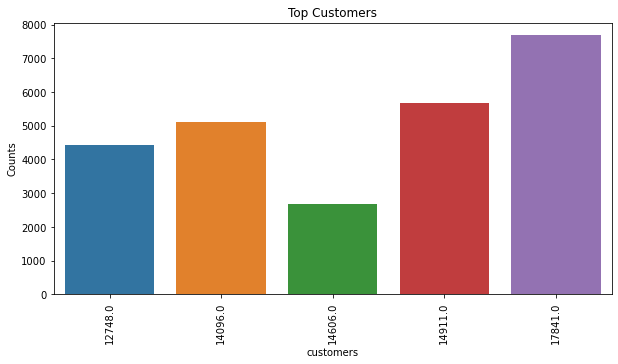

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='customers',y='Counts',data=top_10_cus)
plt.title('Top Customers')
plt.xticks(rotation=90)
plt.show()

### Analysis of categorical variables

In [30]:
cat_var=[x for x in df.columns if df[x].dtypes=='O']
cat_var

['InvoiceNo', 'StockCode', 'Description', 'Country']

### Analysis of StockCode variable

In [31]:
StockCode=df['StockCode'].value_counts().head(5).reset_index(name='Counts')
StockCode=StockCode.rename(columns={'index':'StockCode'})
StockCode.sort_values(ascending=False,by='Counts')

StockCode  Counts
0    85123A    2023
1     22423    1714
2    85099B    1615
3     84879    1395
4     47566    1390

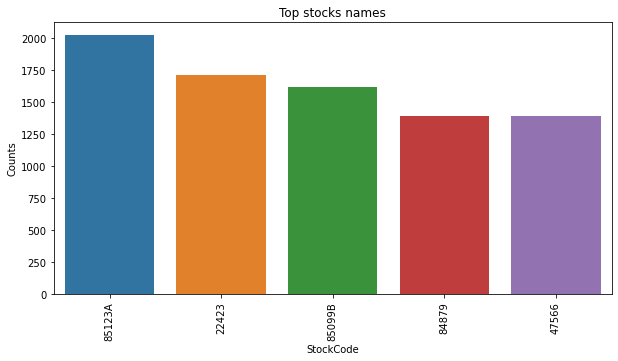

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='StockCode',y='Counts',data=StockCode)
plt.xticks(rotation=90)
plt.title('Top stocks names')
plt.show()

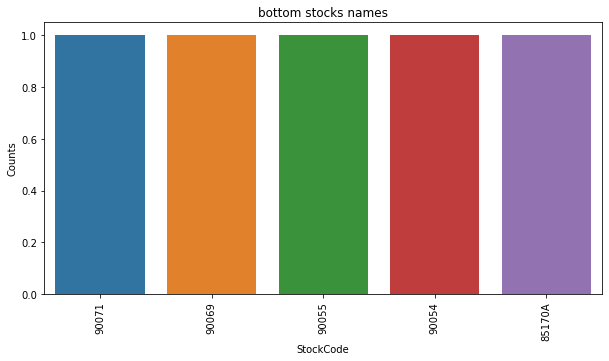

In [33]:
StockCode=df['StockCode'].value_counts().reset_index(name='Counts')
StockCode=StockCode.rename(columns={'index':'StockCode'})
StockCode.sort_values(ascending=False,by='Counts')

plt.figure(figsize=(10,5))
sns.barplot(x='StockCode',y='Counts',data=StockCode[-5:])
plt.xticks(rotation=90)
plt.title('bottom stocks names')
plt.show()

### analysis of Description variable

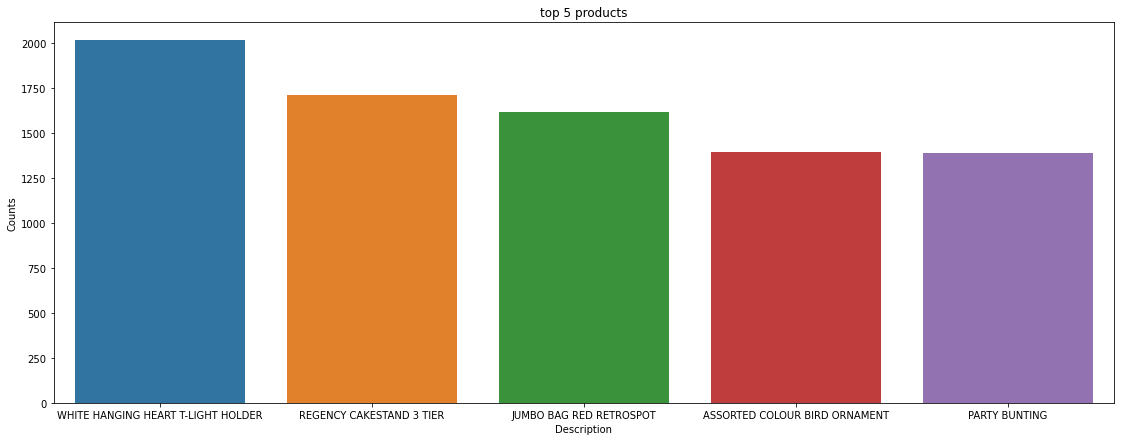

In [34]:
Description=df['Description'].value_counts().reset_index(name='Counts')
Description=Description.rename(columns={'index':'Description'})
Description.sort_values(ascending=False,by='Counts')

plt.figure(figsize=(19,7))
sns.barplot(x='Description',y='Counts',data=Description[:5])
# plt.xticks(rotation=90)
plt.title('top 5 products')
plt.show()

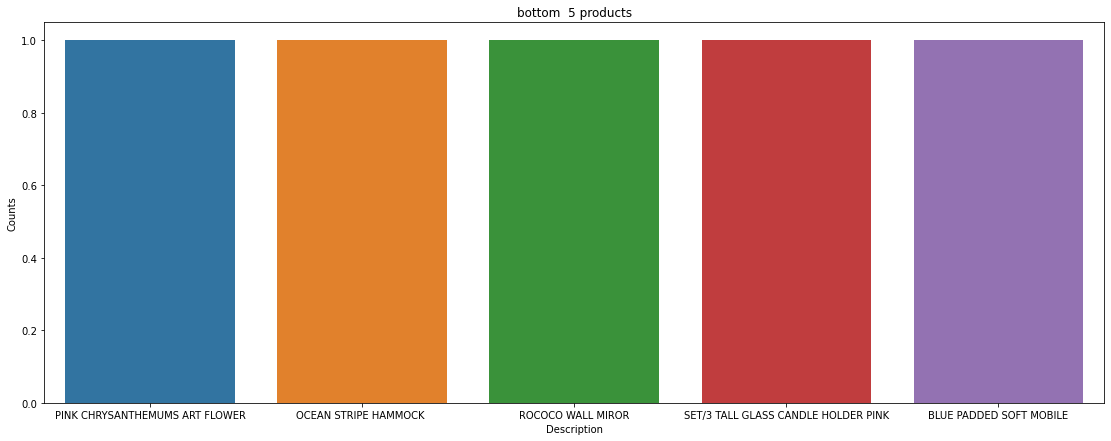

In [35]:
Description=df['Description'].value_counts().reset_index(name='Counts')
Description=Description.rename(columns={'index':'Description'})
Description.sort_values(ascending=False,by='Counts')

plt.figure(figsize=(19,7))
sns.barplot(x='Description',y='Counts',data=Description[-5:])
# plt.xticks(rotation=90)
plt.title('bottom  5 products')
plt.show()

### analysis of Country variable

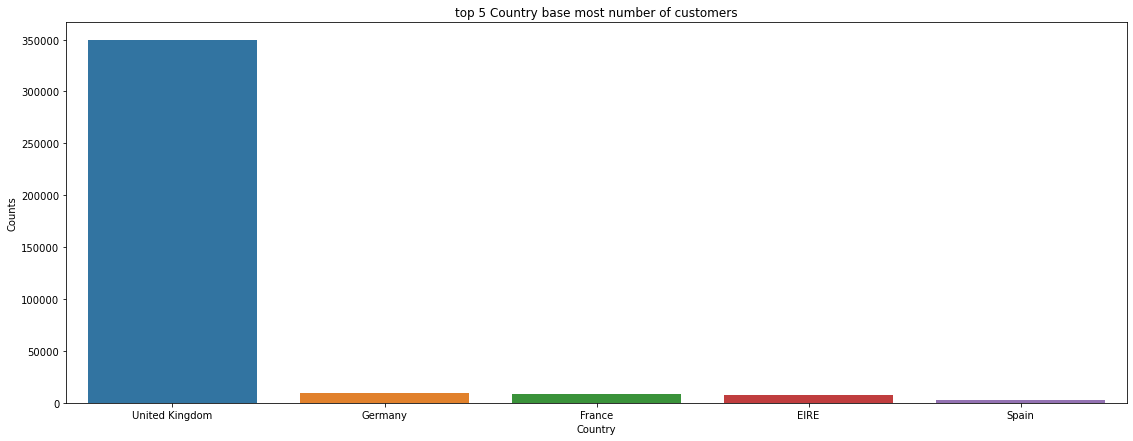

In [36]:
Country=df['Country'].value_counts().reset_index(name='Counts')
Country=Country.rename(columns={'index':'Country'})
Country.sort_values(ascending=False,by='Counts')

plt.figure(figsize=(19,7))
sns.barplot(x='Country',y='Counts',data=Country[:5])
# plt.xticks(rotation=90)
plt.title('top 5 Country base most number of customers')
plt.show()

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

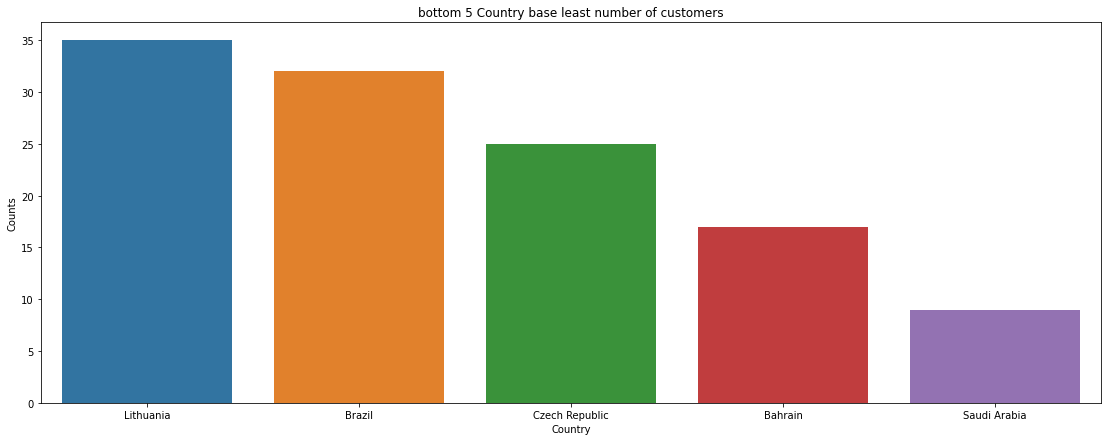

In [37]:
Country=df['Country'].value_counts().reset_index(name='Counts')
Country=Country.rename(columns={'index':'Country'})
Country.sort_values(ascending=False,by='Counts')

plt.figure(figsize=(19,7))
sns.barplot(x='Country',y='Counts',data=Country[-5:])
# plt.xticks(rotation=90)
plt.title('bottom 5 Country base least number of customers')
plt.show()

**From this graph we can see that least number of the customers are from Lithuania,Brazil,Czech Republic Country,Bahrain,Saudi Arabia**

In [38]:
df[df['Country']=='United Kingdom']

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541889 2011-12-09 12:31:00       1.95     15804.0  United Kingdom   
541890 2011-12-09 12:49:00       2.95     13113.0  United Kingdom   
541891 2011-12-09 12:49:00       1.25     13113.0  United Kingdom   
541892 2011-12-09 12:49:00       8.95     13113.0  United Kingdom   
541893 2011-12-09 12:49:00       7.08     13113.0  United Kingdom   

        InvoiceDate_year  InvoiceDate_day  InvoiceDate_month  \
0                   2010                1                 12   
1                   2010                1                 12   
2                   2010                1                 12   
3                   2010                1                 12   
4                   2010                1                 12   
...                  ...              ...                ...   
541889              2011                9                 12   
541890              2011                9                 12   
541891              2011                9                 12   
541892              2011                9                 12   
541893              2011                9                 12   

        InvoiceDate_hour  InvoiceDate_minunts  
0                      8                   26  
1                      8                   26  
2                      8                   26  
3                      8                   26  
4                      8                   26  
...                  ...                  ...  
541889                12                   31  
541890                12                   49  
541891                12                   49  
541892                12                   49  
541893                12                   49  

[349227 rows x 13 columns]

In [39]:
df[df['Country']=='Saudi Arabia']

InvoiceNo StockCode                        Description  Quantity  \
100810    544838     22915      ASSORTED BOTTLE TOP  MAGNETS         12   
100811    544838     22363               GLASS JAR MARMALADE          6   
100812    544838     22362       GLASS JAR PEACOCK BATH SALTS         6   
100813    544838     22361  GLASS JAR DAISY FRESH COTTON WOOL         6   
100814    544838     22553             PLASTERS IN TIN SKULLS        12   
100815    544838     22555          PLASTERS IN TIN STRONGMAN        12   
100816    544838     22556     PLASTERS IN TIN CIRCUS PARADE         12   
100817    544838     20781           GOLD EAR MUFF HEADPHONES         2   
100818    544838     22969       HOMEMADE JAM SCENTED CANDLES        12   

               InvoiceDate  UnitPrice  CustomerID       Country  \
100810 2011-02-24 10:34:00       0.42     12565.0  Saudi Arabia   
100811 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia   
100812 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia   
100813 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia   
100814 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia   
100815 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia   
100816 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia   
100817 2011-02-24 10:34:00       5.49     12565.0  Saudi Arabia   
100818 2011-02-24 10:34:00       1.45     12565.0  Saudi Arabia   

        InvoiceDate_year  InvoiceDate_day  InvoiceDate_month  \
100810              2011               24                  2   
100811              2011               24                  2   
100812              2011               24                  2   
100813              2011               24                  2   
100814              2011               24                  2   
100815              2011               24                  2   
100816              2011               24                  2   
100817              2011               24                  2   
100818              2011               24                  2   

        InvoiceDate_hour  InvoiceDate_minunts  
100810                10                   34  
100811                10                   34  
100812                10                   34  
100813                10                   34  
100814                10                   34  
100815                10                   34  
100816                10                   34  
100817                10                   34  
100818                10                   34

### Analysis of numerical variable

In [40]:
num_var=df.select_dtypes(include=['float64','int64']).columns
num_var=num_var.to_list()

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

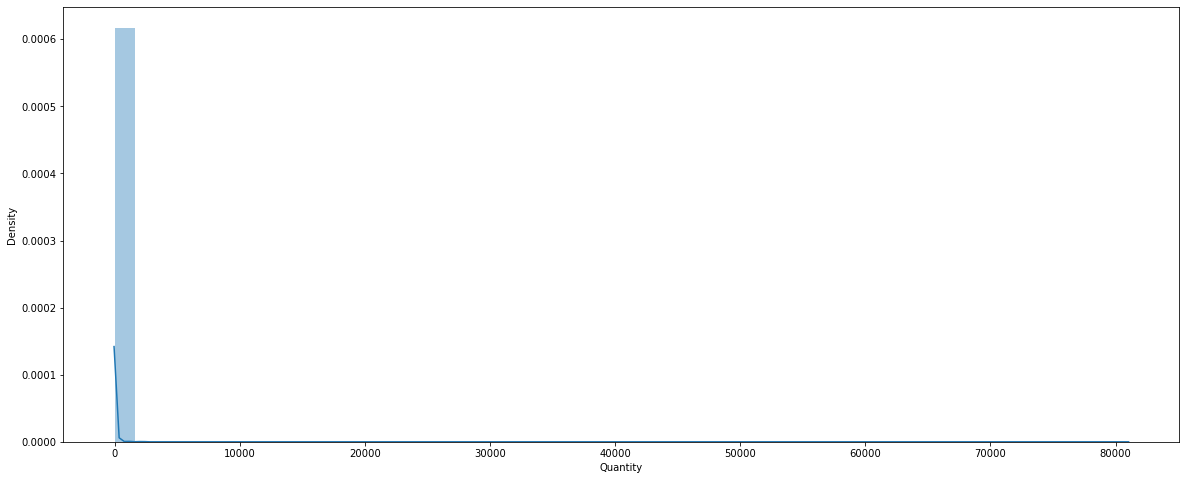

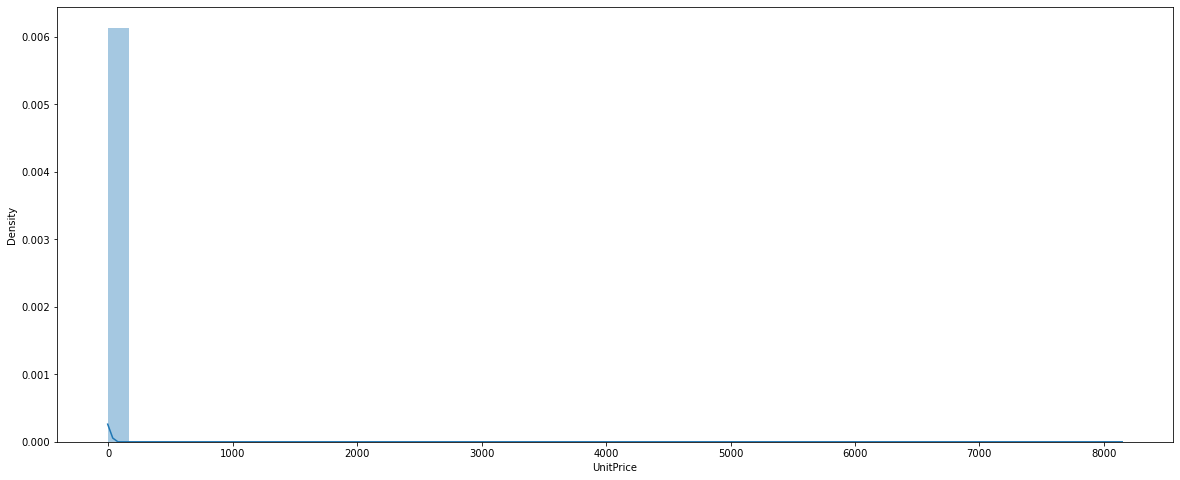

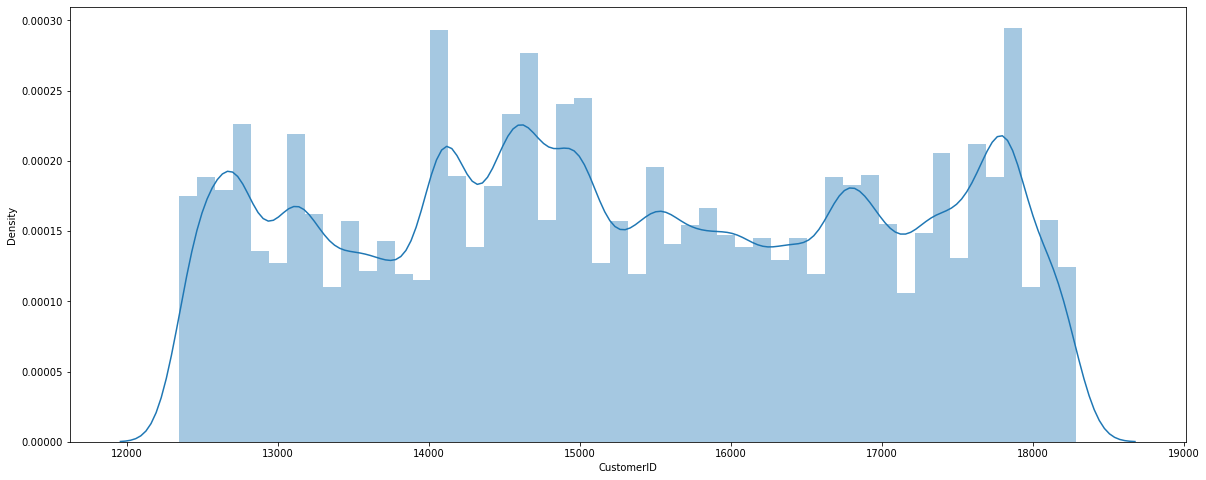

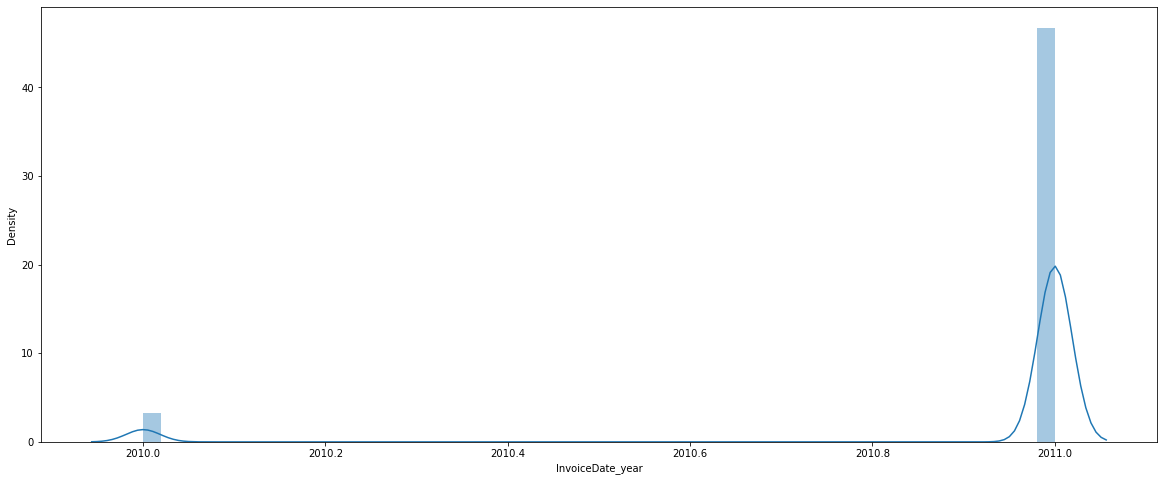

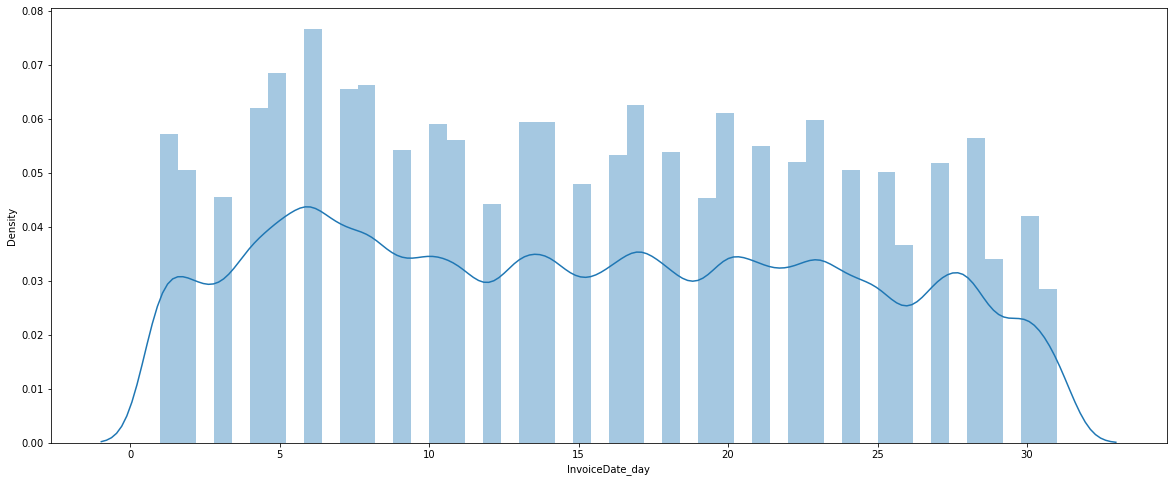

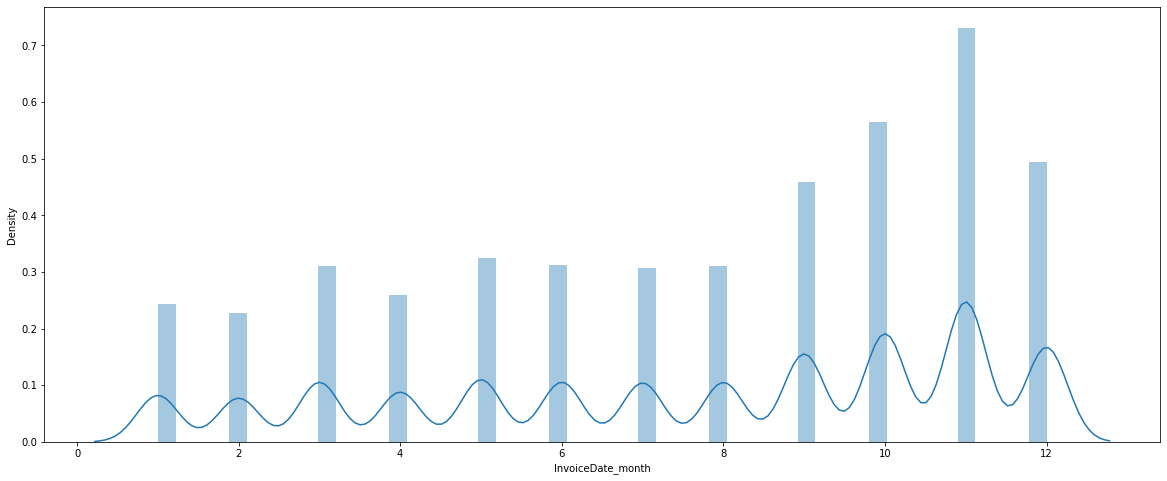

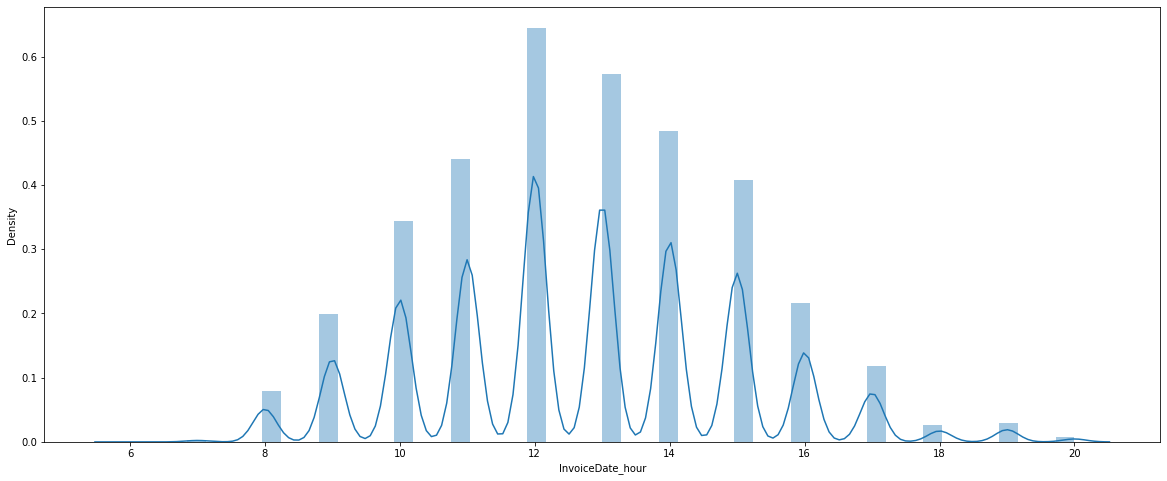

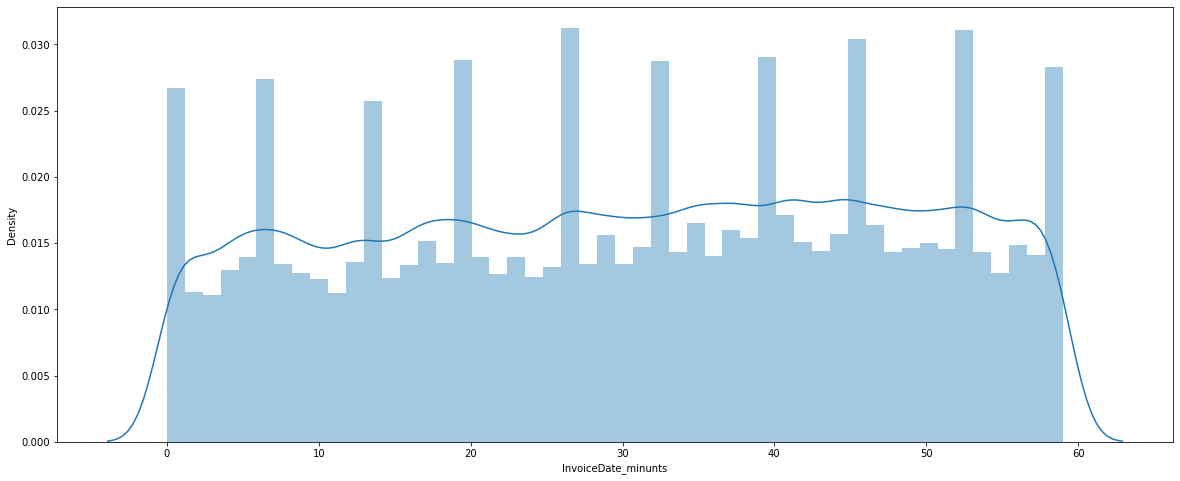

In [41]:
for i in num_var:
    plt.figure(figsize=(20,8))
    sns.distplot(x=df[i])
    plt.xlabel(i)
plt.show()

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\li

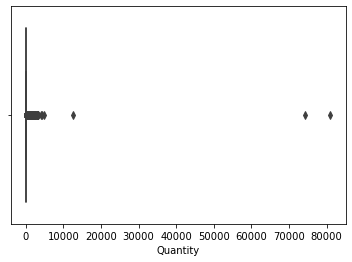

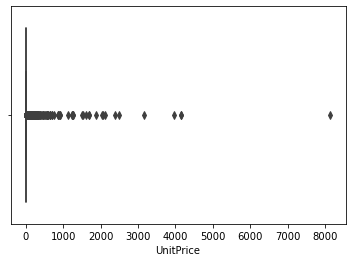

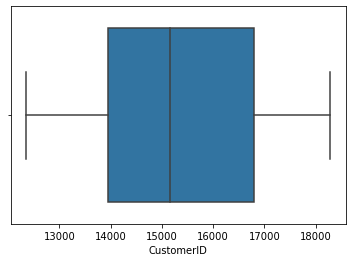

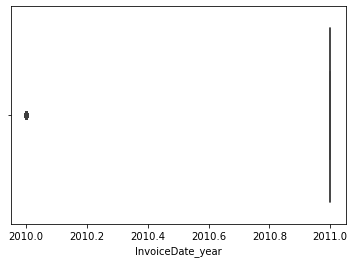

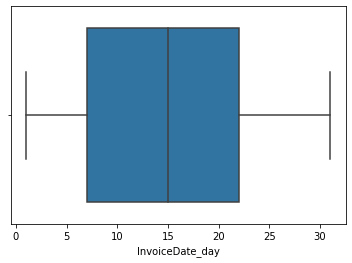

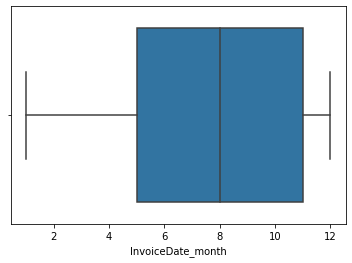

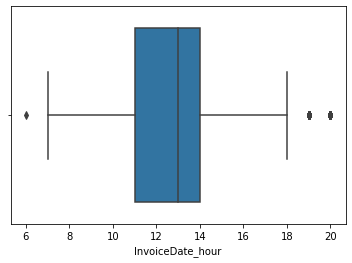

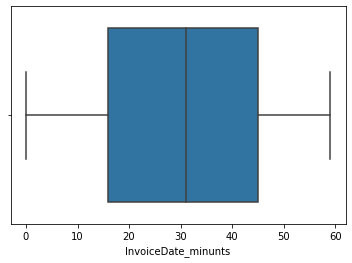

In [42]:
for i in num_var:
    plt.figure()
    sns.boxplot(df[i])

**From above analysis we can see some of variables like Quantity,Unitprice there are outliers present**

## **Feature Engineering**

In [43]:
df['total_amount']=df['Quantity']*df['UnitPrice']

In [44]:
df.groupby('InvoiceDate_year')['total_amount'].count()

InvoiceDate_year
2010     25673
2011    367059
Name: total_amount, dtype: int64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'distribution of Amount'}, xlabel='total_amount', ylabel='Density'>

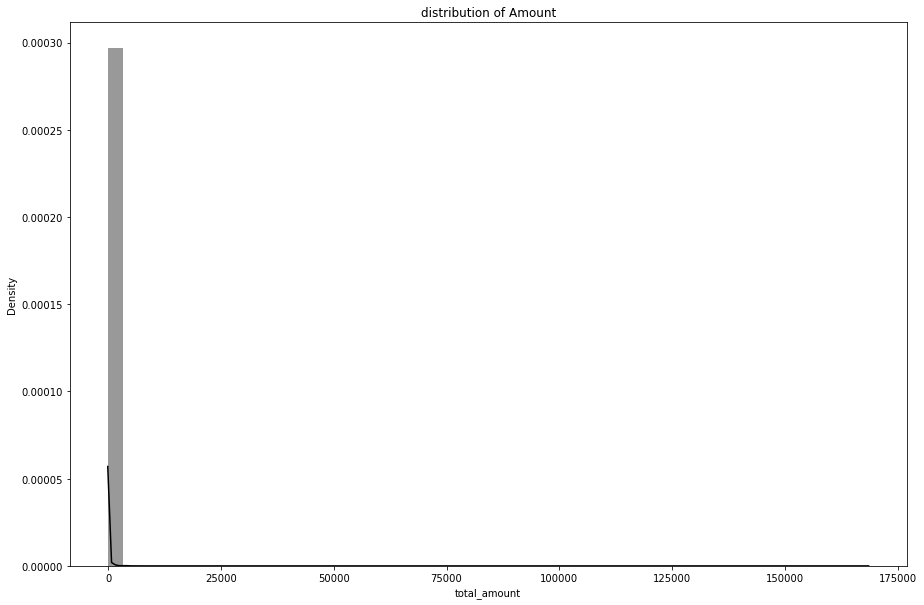

In [45]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['total_amount'],color='black')

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'distribution of Amount'}, xlabel='total_amount', ylabel='Density'>

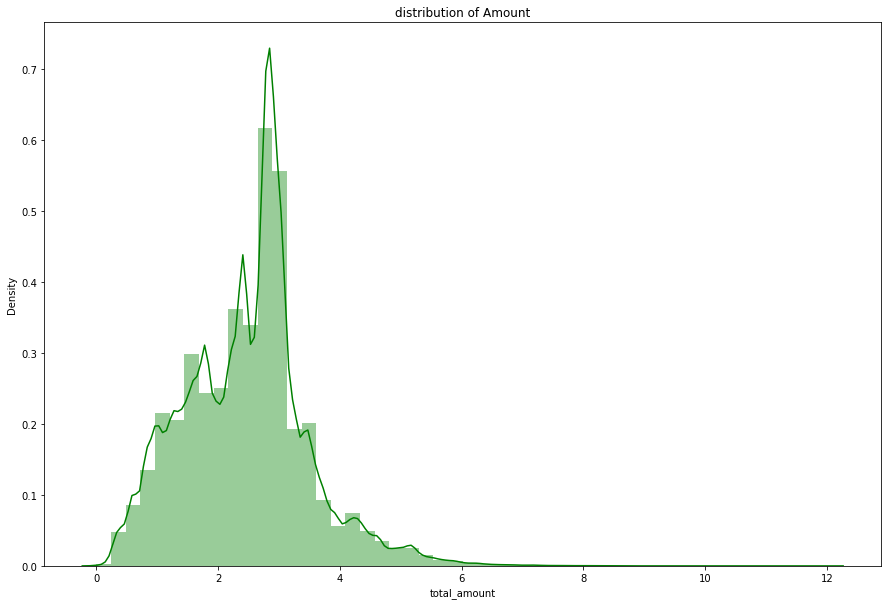

In [46]:
# log_total=df['total_amount'].apply(np.log).round(2)
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(np.log1p(df['total_amount']),color='green')

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

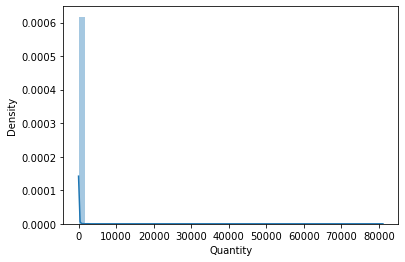

In [47]:
sns.distplot(df['Quantity'])

In [48]:
df['Quantity_']=df['Quantity'].apply(np.log).round(2)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

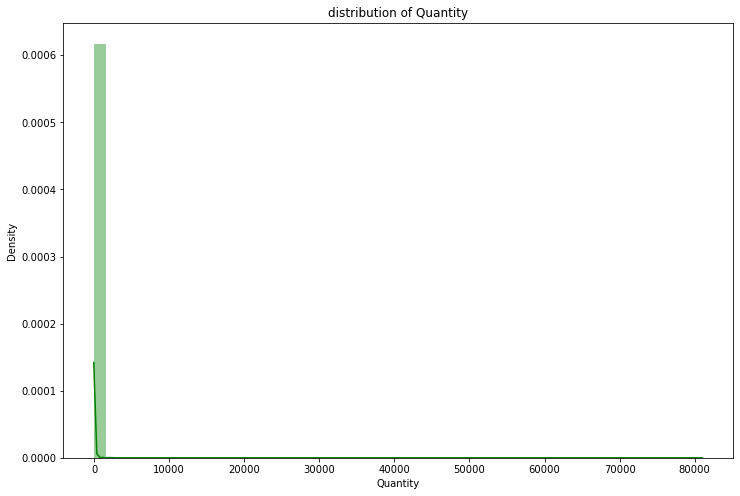

In [49]:
plt.figure(figsize=(12,8))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="Green")
# sns.distplot(df)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

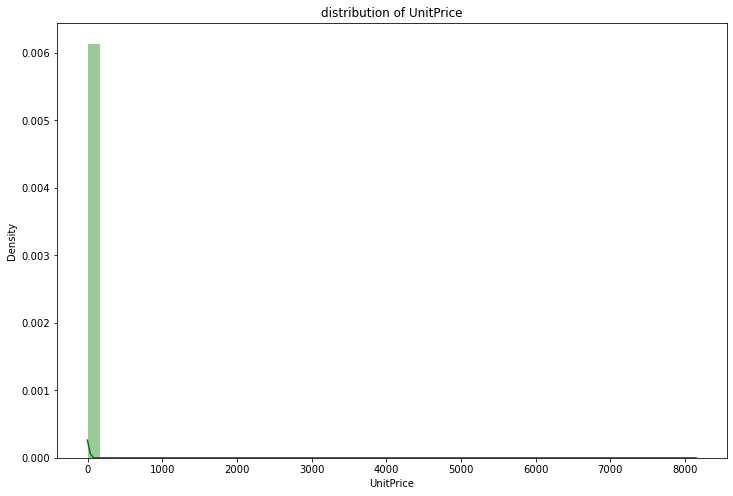

In [50]:
plt.figure(figsize=(12,8))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color='green')

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

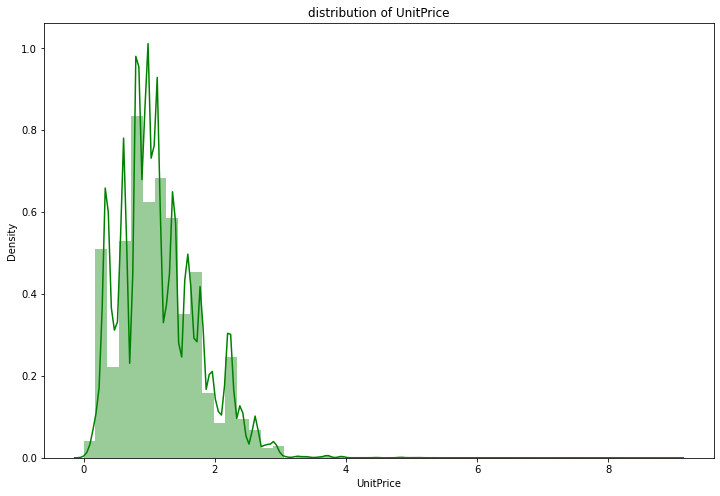

In [51]:
plt.figure(figsize=(12,8))
plt.title('distribution of UnitPrice')
sns.distplot(np.log1p(df['UnitPrice']),color='green')

In [52]:
df['Day_name']=df['InvoiceDate'].dt.day_name()

In [53]:
Day_name=df['Day_name'].value_counts().reset_index(name='num_of_days')
Day_name=Day_name.rename(columns={'index':'days'})
Day_name

days  num_of_days
0   Thursday        79260
1  Wednesday        68043
2    Tuesday        65747
3     Monday        64237
4     Sunday        61214
5     Friday        54231

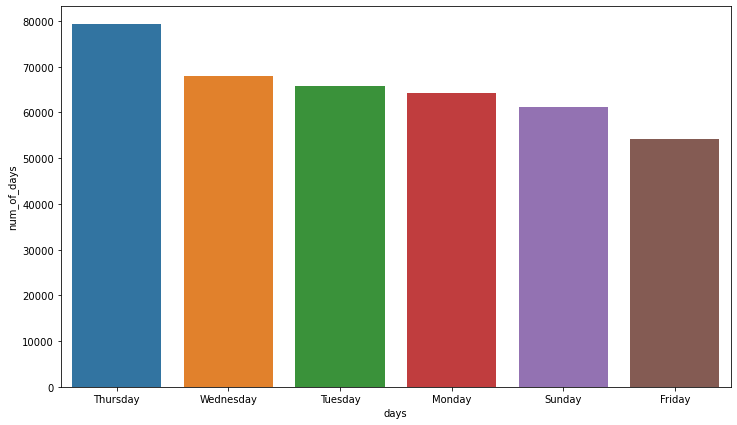

In [54]:
plt.figure(figsize=(12,7))
sns.barplot(x='days',y='num_of_days',data=Day_name)
plt.show()

**Here we see most of people can do shoping on Thursday,Wednesday**

In [55]:
month=df['InvoiceDate_month'].value_counts().reset_index(name='months')
month=month.rename(columns={'index':'mnth_num'})
month

mnth_num  months
0         11   63182
1         10   48796
2         12   42699
3          9   39671
4          5   28075
5          6   26926
6          3   26872
7          8   26796
8          7   26582
9          4   22435
10         1   20991
11         2   19707

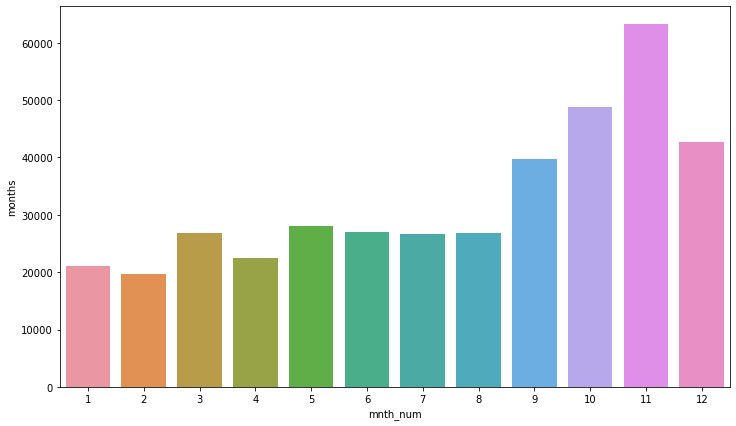

In [56]:
plt.figure(figsize=(12,7))
sns.barplot(x='mnth_num',y='months',data=month)
plt.show()

**from above analysis we can say that most of people purchase in november or month 11**

In [57]:
hour=df['InvoiceDate_hour'].value_counts().reset_index(name='hour')
hour=hour.rename(columns={'index':'hour_num'})
hour

hour_num   hour
0         12  70942
1         13  63024
2         14  53260
3         11  48373
4         15  44793
5         10  37775
6         16  23719
7          9  21928
8         17  12942
9          8   8688
10        19   3234
11        18   2896
12        20    778
13         7    379
14         6      1

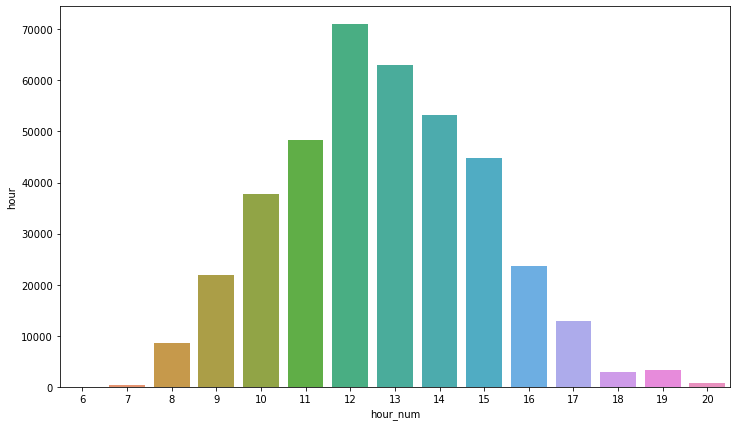

In [58]:
plt.figure(figsize=(12,7))
sns.barplot(x='hour_num',y='hour',data=hour)
plt.show()

**From above analysis we can say that most of the customer like to purchase in afternoon**

In [59]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [60]:
df['time_type']=df['InvoiceDate_hour'].apply(time_type)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_type', ylabel='count'>

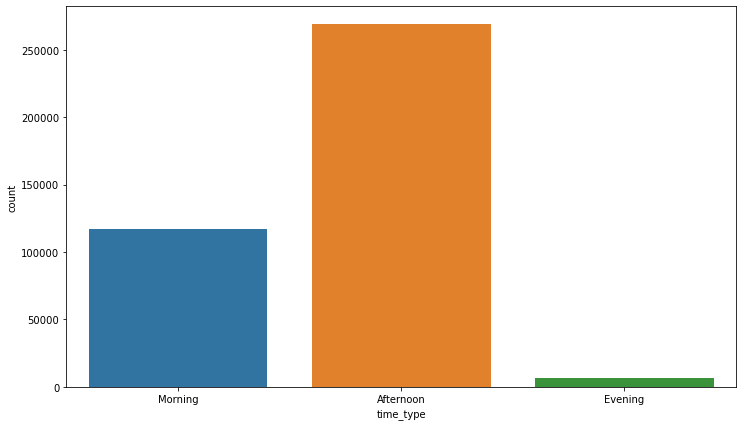

In [61]:
plt.figure(figsize=(12,7))
sns.countplot('time_type',data=df)

**most of customers like to purchase in Evening**

## Creating RFM model

**Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.**

**RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.**

### What is RFM?
**Recency = the interval between the last action and today**

**Frequency = the number of actions between the user’s signup date and today**

**Monetary value = the sum of revenue within the user’s lifetime**

**Recency**

In [62]:
df['CustomerID']=df['CustomerID'].astype('str')

In [63]:
df.CustomerID.dtype

dtype('O')

In [64]:
max_date=max(df['InvoiceDate'])
df['recency']=max_date-df['InvoiceDate']
df['recency']=df['recency'].dt.days
rfm=df.groupby('CustomerID')['recency'].min()
rfm=rfm.reset_index(name='Recency')

In [65]:
rfm

CustomerID  Recency
0       12346.0      325
1       12347.0        1
2       12348.0       74
3       12349.0       18
4       12350.0      309
...         ...      ...
4334    18280.0      277
4335    18281.0      180
4336    18282.0        7
4337    18283.0        3
4338    18287.0       42

[4339 rows x 2 columns]

**Frequency**

In [66]:
frequency=df.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index(name='frequency')
frequency

CustomerID  frequency
0       12346.0          1
1       12347.0        182
2       12348.0         31
3       12349.0         73
4       12350.0         17
...         ...        ...
4334    18280.0         10
4335    18281.0          7
4336    18282.0         12
4337    18283.0        721
4338    18287.0         70

[4339 rows x 2 columns]

**Monetary**

In [67]:
monetary=df.groupby('CustomerID')['total_amount'].sum()
monetary=monetary.reset_index(name='monetary')
monetary

CustomerID  monetary
0       12346.0  77183.60
1       12347.0   4310.00
2       12348.0   1797.24
3       12349.0   1757.55
4       12350.0    334.40
...         ...       ...
4334    18280.0    180.60
4335    18281.0     80.82
4336    18282.0    178.05
4337    18283.0   2045.53
4338    18287.0   1837.28

[4339 rows x 2 columns]

In [68]:
rfm_df=pd.merge(rfm,frequency,on='CustomerID')
rfm_df=pd.merge(rfm_df,monetary,on='CustomerID')
rfm_df.columns = ['CustomerID', 'Recency', 'frequency', 'monetary']
rfm_df

CustomerID  Recency  frequency  monetary
0       12346.0      325          1  77183.60
1       12347.0        1        182   4310.00
2       12348.0       74         31   1797.24
3       12349.0       18         73   1757.55
4       12350.0      309         17    334.40
...         ...      ...        ...       ...
4334    18280.0      277         10    180.60
4335    18281.0      180          7     80.82
4336    18282.0        7         12    178.05
4337    18283.0        3        721   2045.53
4338    18287.0       42         70   1837.28

[4339 rows x 4 columns]

In [69]:
rfm_df.Recency.describe().T

count    4339.000000
mean       91.518322
std       100.009747
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

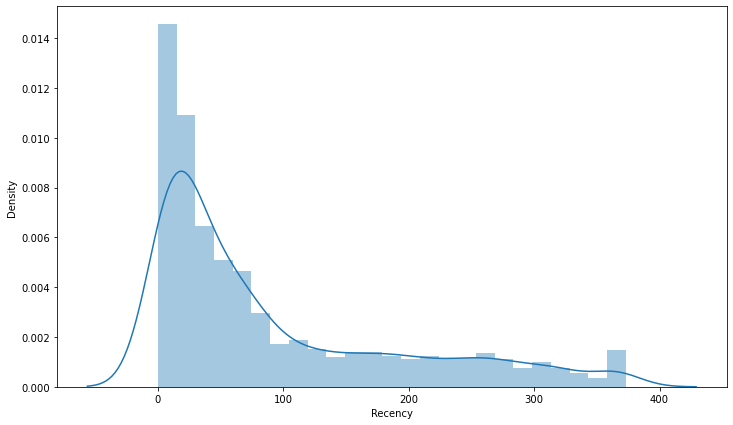

In [70]:
plt.figure(figsize=(12,7))
sns.distplot(rfm.Recency)

In [71]:
rfm_df.frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: frequency, dtype: float64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frequency', ylabel='Density'>

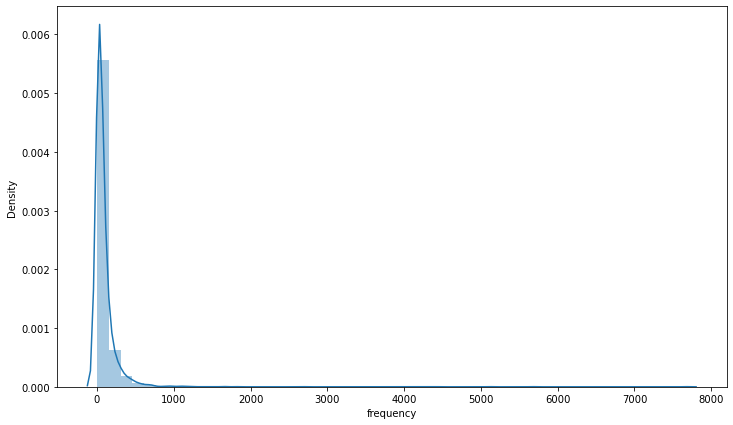

In [72]:
plt.figure(figsize=(12,7))
sns.distplot(rfm_df.frequency)

In [73]:
rfm_df.monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: monetary, dtype: float64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary', ylabel='Density'>

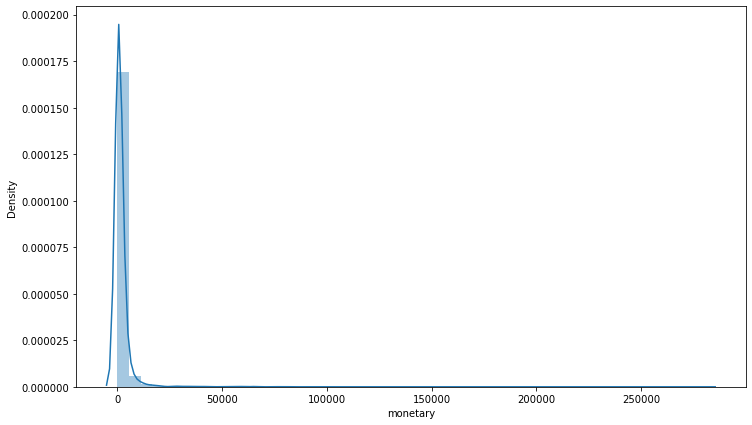

In [74]:
plt.figure(figsize=(12,7))
sns.distplot(rfm_df.monetary)

In [75]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [76]:
qut = pd.DataFrame(quantiles)
print(qut)

      Recency  frequency  monetary
0.25     17.0       17.0   306.455
0.50     50.0       41.0   668.560
0.75    141.0       98.0  1660.315


In [77]:
#Functions to create R, F and M segments

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [78]:
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['frequency'].apply(FnMScoring, args=('frequency',quantiles,))
rfm_df['M'] = rfm_df['monetary'].apply(FnMScoring, args=('monetary',quantiles,))
rfm_df.head()

CustomerID  Recency  frequency  monetary  R  F  M
0    12346.0      325          1  77183.60  4  4  1
1    12347.0        1        182   4310.00  1  1  1
2    12348.0       74         31   1797.24  3  3  1
3    12349.0       18         73   1757.55  2  2  1
4    12350.0      309         17    334.40  4  4  3

In [79]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

CustomerID  Recency  frequency  monetary  R  F  M RFMGroup  RFMScore
0    12346.0      325          1  77183.60  4  4  1      441         9
1    12347.0        1        182   4310.00  1  1  1      111         3
2    12348.0       74         31   1797.24  3  3  1      331         7
3    12349.0       18         73   1757.55  2  2  1      221         5
4    12350.0      309         17    334.40  4  4  3      443        11

### Outlier treatment 

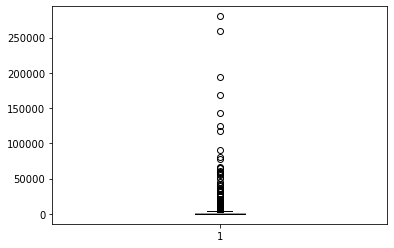

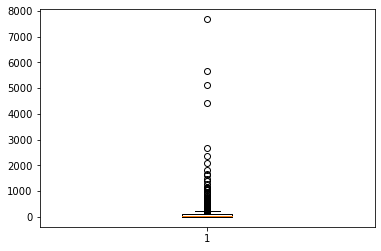

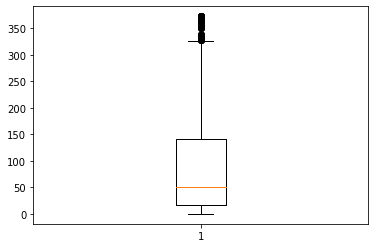

In [80]:
plt.boxplot(rfm_df['monetary'])
plt.show()
plt.boxplot(rfm_df['frequency'])
plt.show()
plt.boxplot(rfm_df['Recency'])
plt.show()

In [81]:
q1_r=rfm_df['Recency'].quantile(0.05)
q3_r=rfm_df['Recency'].quantile(0.95)

iqr_r=q3_r-q1_r

rfm_df=rfm_df[(rfm_df['Recency']>=q1_r-1.5*iqr_r) & (rfm_df['Recency']<=q3_r+1.5*iqr_r)]


In [82]:
q1_f=rfm_df['frequency'].quantile(0.05)
q3_f=rfm_df['frequency'].quantile(0.95)

iqr_f=q3_f-q1_f

rfm_df=rfm_df[(rfm_df['frequency']>=q1_f-1.5*iqr_f) & (rfm_df['frequency']<=q3_f+1.5*iqr_f)]

In [83]:
q1_m=rfm_df['monetary'].quantile(0.05)
q3_m=rfm_df['monetary'].quantile(0.95)

iqr_m=q3_m-q1_m

rfm_df=rfm_df[(rfm_df['monetary']>=q1_m-1.5*iqr_m) & (rfm_df['monetary']<=q3_m+1.5*iqr_m)]

In [84]:
rfm_df

CustomerID  Recency  frequency  monetary  R  F  M RFMGroup  RFMScore
1       12347.0        1        182   4310.00  1  1  1      111         3
2       12348.0       74         31   1797.24  3  3  1      331         7
3       12349.0       18         73   1757.55  2  2  1      221         5
4       12350.0      309         17    334.40  4  4  3      443        11
5       12352.0       35         85   2506.04  2  2  1      221         5
...         ...      ...        ...       ... .. .. ..      ...       ...
4334    18280.0      277         10    180.60  4  4  4      444        12
4335    18281.0      180          7     80.82  4  4  4      444        12
4336    18282.0        7         12    178.05  1  4  4      144         9
4337    18283.0        3        721   2045.53  1  1  1      111         3
4338    18287.0       42         70   1837.28  2  2  1      221         5

[4256 rows x 9 columns]

In [85]:
from math import log

In [86]:
from sklearn import preprocessing

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
# Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['monetary'] = [handle_neg_n_zero(x) for x in rfm_df.monetary]



In [87]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(np.log).round(2)

rfm_df['Frequency_log'] = rfm_df['frequency'].apply(np.log).round(2)
rfm_df['Monetary_log'] = rfm_df['monetary'].apply(np.log).round(2)

In [88]:
rfm_df

CustomerID  Recency  frequency  monetary  R  F  M RFMGroup  RFMScore  \
1       12347.0        1        182   4310.00  1  1  1      111         3   
2       12348.0       74         31   1797.24  3  3  1      331         7   
3       12349.0       18         73   1757.55  2  2  1      221         5   
4       12350.0      309         17    334.40  4  4  3      443        11   
5       12352.0       35         85   2506.04  2  2  1      221         5   
...         ...      ...        ...       ... .. .. ..      ...       ...   
4334    18280.0      277         10    180.60  4  4  4      444        12   
4335    18281.0      180          7     80.82  4  4  4      444        12   
4336    18282.0        7         12    178.05  1  4  4      144         9   
4337    18283.0        3        721   2045.53  1  1  1      111         3   
4338    18287.0       42         70   1837.28  2  2  1      221         5   

      Recency_log  Frequency_log  Monetary_log  
1            0.00           5.20          8.37  
2            4.30           3.43          7.49  
3            2.89           4.29          7.47  
4            5.73           2.83          5.81  
5            3.56           4.44          7.83  
...           ...            ...           ...  
4334         5.62           2.30          5.20  
4335         5.19           1.95          4.39  
4336         1.95           2.48          5.18  
4337         1.10           6.58          7.62  
4338         3.74           4.25          7.52  

[4256 rows x 12 columns]

### Basically we are giving higher score to a person how have high budget, as well how buy more frequently

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency_log', ylabel='Density'>

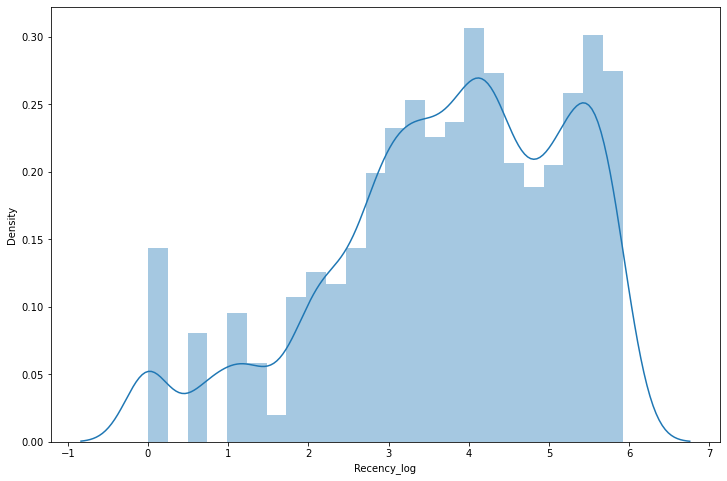

In [89]:
plt.figure(figsize=(12,8))
sns.distplot(rfm_df.Recency_log)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency_log', ylabel='Density'>

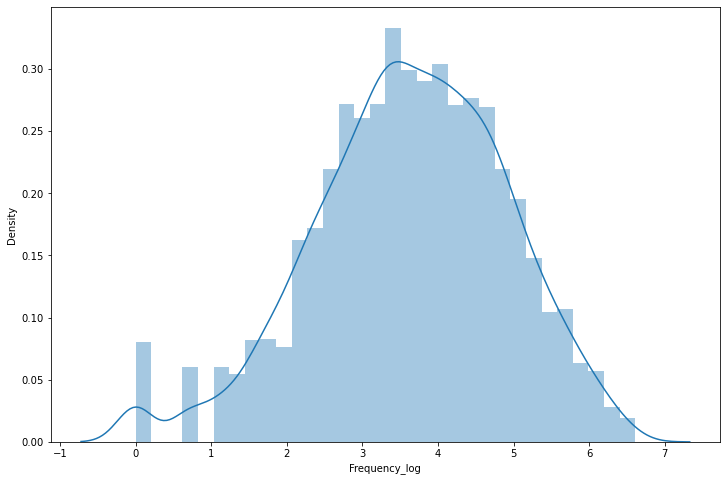

In [90]:
plt.figure(figsize=(12,8))
sns.distplot(rfm_df['Frequency_log'])

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary_log', ylabel='Density'>

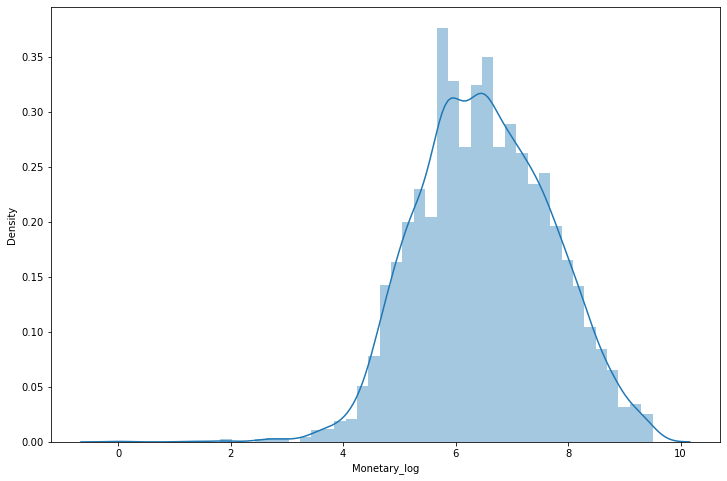

In [91]:
plt.figure(figsize=(12,8))
sns.distplot(rfm_df['Monetary_log'])

**standardization of data**

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


##  K-Mean clustering

**Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.**

**Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.**

#### **The way kmeans algorithm works is as follows:**

**Specify number of clusters K.**

**Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.**

**.Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.**

**.Compute the sum of the squared distance between data points and all centroids..**

**.Assign each data point to the closest cluster (centroid)..**

**.Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster..**

**.The approach kmeans follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster..**

#### Applying elbow method
**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.**

**When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease.**

**Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.**

In [93]:
from sklearn.cluster import KMeans


**Applying Elbow Method on Recency and Monetary**

In [94]:
sd_scale=rfm_df[['Recency_log','Monetary_log']]
X=scaler.fit_transform(sd_scale)
X

array([[-2.5314745 ,  1.58414914],
       [ 0.37151939,  0.83226571],
       [-0.58039256,  0.81517745],
       ...,
       [-1.21500053, -1.1414283 ],
       [-1.78884816,  0.9433394 ],
       [-0.00654493,  0.8578981 ]])

In [95]:
from sklearn.metrics import silhouette_samples, silhouette_score

features_rec_mon=rfm_df[['Recency_log','Monetary_log']].values
X_rec_mon=scaler.fit_transform(features_rec_mon)
X=X_rec_mon

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.415493487790415
For n_clusters = 3, silhouette score is 0.3512256724548179
For n_clusters = 4, silhouette score is 0.36278141356342936
For n_clusters = 5, silhouette score is 0.3496315485406723
For n_clusters = 6, silhouette score is 0.3526716292572511
For n_clusters = 7, silhouette score is 0.33989424827891396
For n_clusters = 8, silhouette score is 0.3465989561254425
For n_clusters = 9, silhouette score is 0.34989587800619176
For n_clusters = 10, silhouette score is 0.3418510346846226
For n_clusters = 11, silhouette score is 0.3469801395975815
For n_clusters = 12, silhouette score is 0.3430663412401404
For n_clusters = 13, silhouette score is 0.3426223400844971
For n_clusters = 14, silhouette score is 0.34578528751487186
For n_clusters = 15, silhouette score is 0.3450808787101048


In [96]:
wcss1=[]
for i in range(1,12):
        km=KMeans(n_clusters=i,init='k-means++',max_iter=100)
        km.fit(X)
        wcss1.append(km.inertia_)

In [97]:
wcss1

[8512.000000000002,
 4407.636810471282,
 3246.623206842643,
 2478.9567692335663,
 2001.6379499312075,
 1723.0235601186203,
 1494.2704770085159,
 1295.9268375494626,
 1149.8663561275137,
 1045.507243112204,
 952.4855892583923]

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

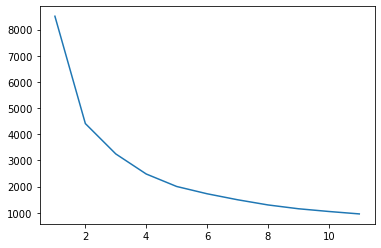

In [98]:
sns.lineplot(range(1,12),wcss1)

In [99]:
km=KMeans(n_clusters=2,max_iter=100)
y_kmean=km.fit_predict(X)
y_kmean

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
km.cluster_centers_

array([[-0.79167207,  0.81107627],
       [ 0.59432395, -0.60889107]])

In [101]:
centers=km.cluster_centers_

In [102]:
# plt.figure(figsize=(10,9))
# plt.scatter(X[y_kmean==0,0],X[y_kmean==0,1],c='black',label='scatter 1')
# plt.scatter(X[y_kmean==1,0],X[y_kmean==1,1],c='blue',label='scatter 2')
# # plt.scatter(X[y_kmean==2,0],X[y_kmean==2,1],c='red',label='scatter3')

# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

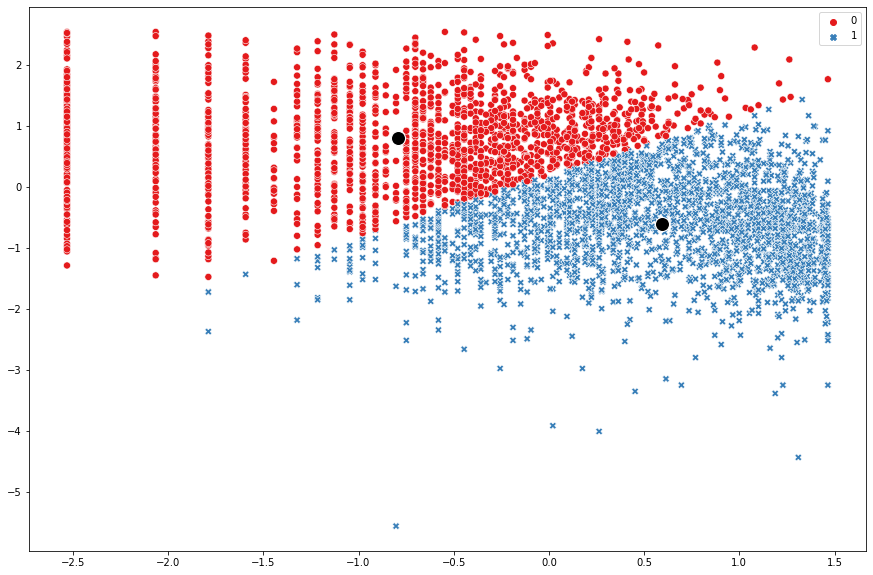

In [103]:
plt.figure(figsize=(15,10))
sns.scatterplot(X[:, 0], X[:, 1], c=y_kmean, s=50, cmap='spring',hue=km.labels_,style=km.labels_, palette="Set1")

sns.scatterplot(centers[:, 0], centers[:, 1], s=200, alpha=1,color='black')

#### Applying Elbow Method on Frequency and Monetary

In [104]:
from sklearn.metrics import silhouette_samples, silhouette_score

features_frec_mon=rfm_df[['Frequency_log','Monetary_log']].values
X_frec_mon=scaler.fit_transform(features_frec_mon)
X_frec_mon

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_frec_mon)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_frec_mon, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4821271661661233
For n_clusters = 3, silhouette score is 0.4132497465337889
For n_clusters = 4, silhouette score is 0.37255476539366866
For n_clusters = 5, silhouette score is 0.3358769345081162
For n_clusters = 6, silhouette score is 0.35070269362790657
For n_clusters = 7, silhouette score is 0.34077167946301756
For n_clusters = 8, silhouette score is 0.3556350664895072
For n_clusters = 9, silhouette score is 0.36712268590174874
For n_clusters = 10, silhouette score is 0.3519923248557825
For n_clusters = 11, silhouette score is 0.36271842451167985
For n_clusters = 12, silhouette score is 0.367743410005096
For n_clusters = 13, silhouette score is 0.3585012082497882
For n_clusters = 14, silhouette score is 0.36909553958175206
For n_clusters = 15, silhouette score is 0.35868904931017304


In [105]:
x=rfm_df[['Frequency_log','Monetary_log']]
fm=scaler.fit_transform(x)
fm

array([[ 1.23164471,  1.58414914],
       [-0.15372939,  0.83226571],
       [ 0.51939023,  0.81517745],
       ...,
       [-0.89729176, -1.1414283 ],
       [ 2.31176689,  0.9433394 ],
       [ 0.48808234,  0.8578981 ]])

In [106]:
wcss=[]
for i in range(1,12):
        km=KMeans(n_clusters=i,init='k-means++',max_iter=100)
        km.fit(fm)
        wcss.append(km.inertia_)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

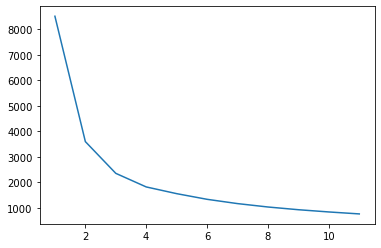

In [107]:
sns.lineplot(range(1,12),wcss)

In [108]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=1000)
y_fm=km.fit_predict(fm)

In [109]:
center=km.cluster_centers_

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

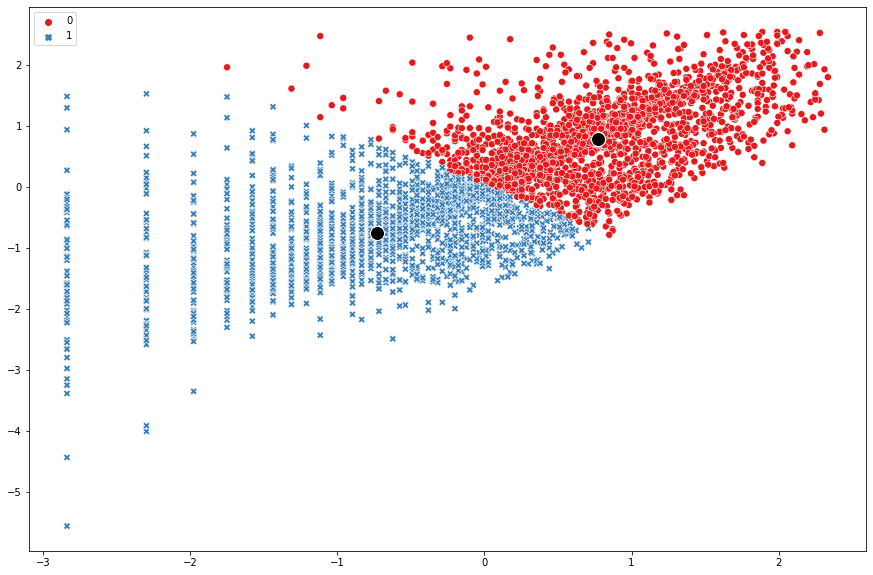

In [110]:
plt.figure(figsize=(15,10))
sns.scatterplot(fm[:, 0], fm[:, 1], c=y_fm, s=50, cmap='bwr',hue=km.labels_,style=km.labels_, palette="Set1")

sns.scatterplot(center[:, 0], center[:, 1], s=200, alpha=1,color='black')

#### Applying Elbow Method ona rcency Frequency and Monetary

In [111]:
rfm_km=rfm_df[['Recency_log','Frequency_log','Monetary_log']]
rfm_km=scaler.fit_transform(rfm_km)
rfm_km

array([[-2.5314745 ,  1.23164471,  1.58414914],
       [ 0.37151939, -0.15372939,  0.83226571],
       [-0.58039256,  0.51939023,  0.81517745],
       ...,
       [-1.21500053, -0.89729176, -1.1414283 ],
       [-1.78884816,  2.31176689,  0.9433394 ],
       [-0.00654493,  0.48808234,  0.8578981 ]])

In [112]:
wcss2=[]
for i in range(1,12):
        km=KMeans(n_clusters=i,init='k-means++',max_iter=100)
        km.fit(rfm_km)
        wcss2.append(km.inertia_)
print(wcss2)

[12768.0, 6735.703051164885, 5224.769381187088, 4373.179618735753, 3661.5207601218854, 3276.6574201689527, 2948.8014051960636, 2702.5639937078413, 2521.3544888351576, 2340.001457290114, 2178.9703090087364]


C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


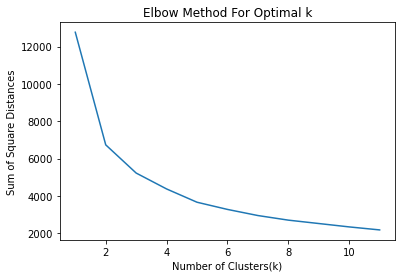

In [113]:
sns.lineplot(range(1,12),wcss2)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow_rfm')
plt.show()


In [114]:
from sklearn.metrics import silhouette_samples, silhouette_score

features_rfm_mon=rfm_df[['Recency_log','Frequency_log','Monetary_log']].values
X_rfm_mon=scaler.fit_transform(features_rfm_mon)
X_rfm_mon

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_rfm_mon)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_rfm_mon, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39381845452063274
For n_clusters = 3, silhouette score is 0.2990789601659683
For n_clusters = 4, silhouette score is 0.29619230013205783
For n_clusters = 5, silhouette score is 0.28302911905372297
For n_clusters = 6, silhouette score is 0.2652279418599285
For n_clusters = 7, silhouette score is 0.269615534735209
For n_clusters = 8, silhouette score is 0.27139482037166285
For n_clusters = 9, silhouette score is 0.26550108863937544
For n_clusters = 10, silhouette score is 0.2637896507612122
For n_clusters = 11, silhouette score is 0.2711485359597176
For n_clusters = 12, silhouette score is 0.2657138018440741
For n_clusters = 13, silhouette score is 0.26437662766844183
For n_clusters = 14, silhouette score is 0.2597141770102788
For n_clusters = 15, silhouette score is 0.26185702381167597


In [115]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=1000)
rfm_pred=km.fit_predict(rfm_km)

In [116]:
Center=km.cluster_centers_

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

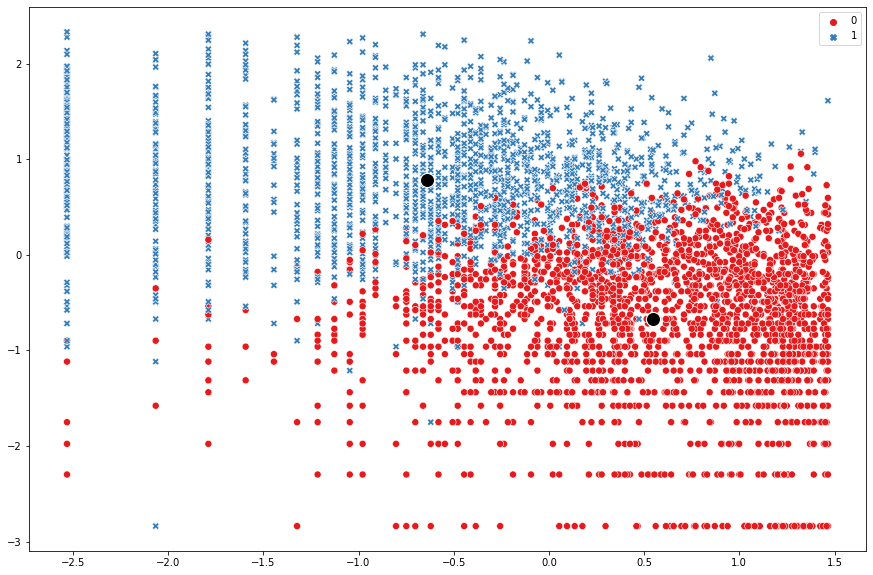

In [117]:
plt.figure(figsize=(15,10))
sns.scatterplot(rfm_km[:, 0], rfm_km[:, 1], c=rfm_pred, s=50, cmap='bwr',hue=km.labels_,style=km.labels_, palette="Set1")

sns.scatterplot(Center[:, 0], Center[:, 1], s=200, alpha=1,color='black')

### Hierarchical clustering

### Dendogram to find the optimal number of clusters

In [118]:
x_=rfm_df[['Recency_log','Frequency_log','Monetary_log']]
x_=scaler.fit_transform(x_)
x_

array([[-2.5314745 ,  1.23164471,  1.58414914],
       [ 0.37151939, -0.15372939,  0.83226571],
       [-0.58039256,  0.51939023,  0.81517745],
       ...,
       [-1.21500053, -0.89729176, -1.1414283 ],
       [-1.78884816,  2.31176689,  0.9433394 ],
       [-0.00654493,  0.48808234,  0.8578981 ]])

In [119]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distances')

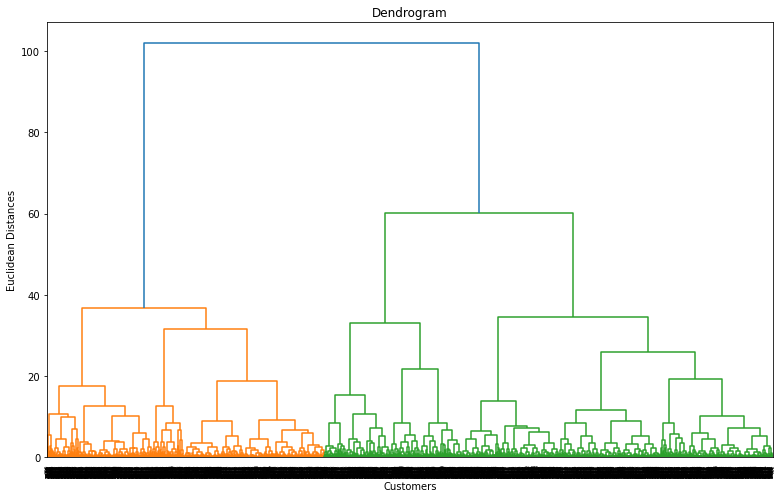

In [120]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x_, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

In [121]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_agc=agc.fit_predict(x_)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

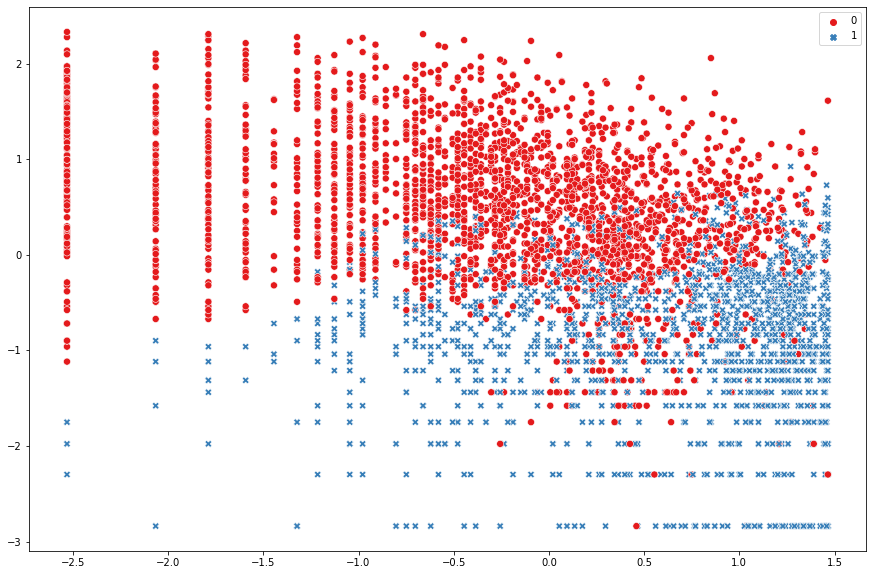

In [122]:
plt.figure(figsize=(15,10))
sns.scatterplot(x_[:, 0], x_[:, 1], c=y_agc, s=50, cmap='bwr',hue=agc.labels_,style=agc.labels_, palette="Set1")

agc.labels_
# sns.scatterplot(center[:, 0], center[:, 1], s=200, alpha=1,color='black')

### Applying DBSCAN on Recency and Monetary

In [123]:
x_db=rfm_df[['Recency_log','Monetary_log']]
x_db=scaler.fit_transform(x_db)
x_db

array([[-2.5314745 ,  1.58414914],
       [ 0.37151939,  0.83226571],
       [-0.58039256,  0.81517745],
       ...,
       [-1.21500053, -1.1414283 ],
       [-1.78884816,  0.9433394 ],
       [-0.00654493,  0.8578981 ]])

#### Applying Elbow Method on Recency and Monetary

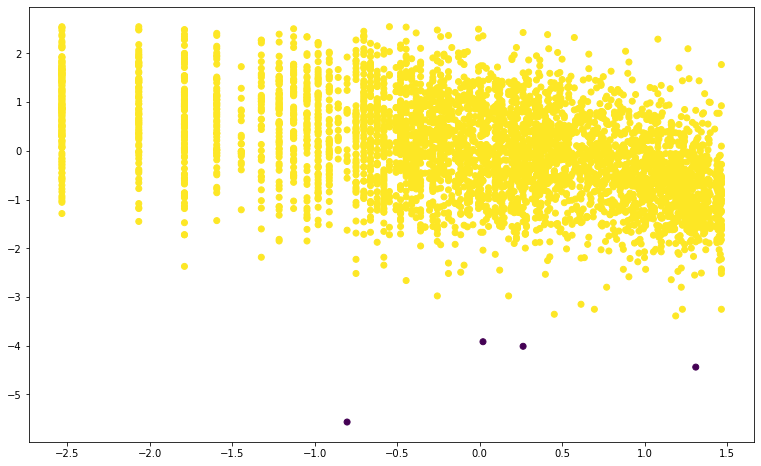

In [124]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.7,min_samples=15)
y_db=db.fit_predict(x_db)
plt.figure(figsize=(13,8))
plt.scatter(x_db[:,0], x_db[:,1], c=y_db)

In [125]:
y_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
from sklearn.metrics import silhouette_score
silhouette_score(x_db,y_db)

0.6085490191479367

#### Applying DBSCAN on Frequency and Monetary

In [127]:
fre_mon=rfm_df[['Frequency_log','Monetary_log']]
fre_mon=scaler.fit_transform(fre_mon)
fre_mon

array([[ 1.23164471,  1.58414914],
       [-0.15372939,  0.83226571],
       [ 0.51939023,  0.81517745],
       ...,
       [-0.89729176, -1.1414283 ],
       [ 2.31176689,  0.9433394 ],
       [ 0.48808234,  0.8578981 ]])

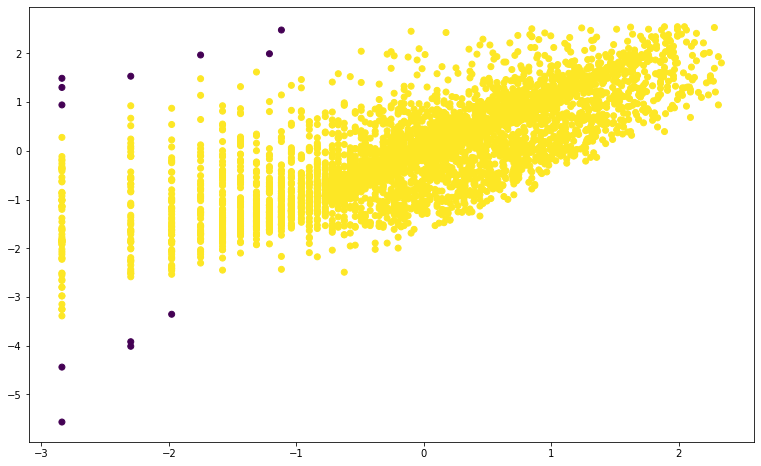

In [128]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.6,min_samples=15)
y_pred=db.fit_predict(fre_mon)
plt.figure(figsize=(13,8))
plt.scatter(fre_mon[:,0], fre_mon[:,1], c=y_pred)

In [129]:
silhouette_score(fre_mon,y_pred)

0.5570561987913384

### Applying DBSCAN on frequency, Recency and Monetary

In [130]:
rfm_db=rfm_df[['Recency_log','Frequency_log','Monetary_log']]
rfm_db=scaler.fit_transform(rfm_db)
rfm_db

array([[-2.5314745 ,  1.23164471,  1.58414914],
       [ 0.37151939, -0.15372939,  0.83226571],
       [-0.58039256,  0.51939023,  0.81517745],
       ...,
       [-1.21500053, -0.89729176, -1.1414283 ],
       [-1.78884816,  2.31176689,  0.9433394 ],
       [-0.00654493,  0.48808234,  0.8578981 ]])

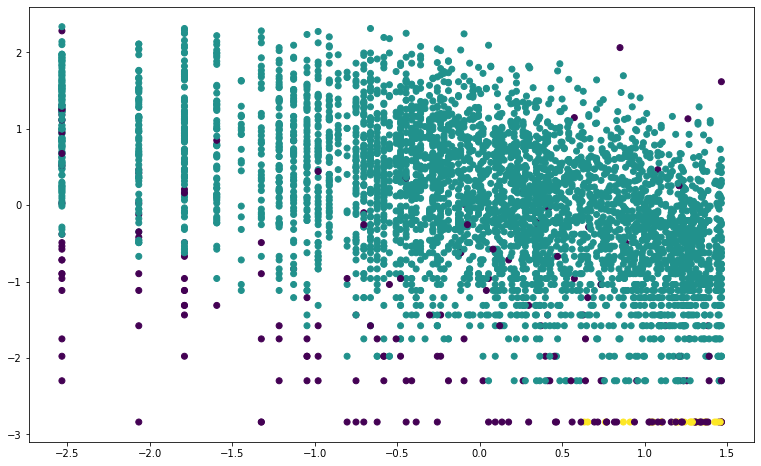

In [131]:
from sklearn.cluster import DBSCAN
dbc=DBSCAN(eps=0.5,min_samples=15)
y_dbc=dbc.fit_predict(rfm_db)
plt.figure(figsize=(13,8))
plt.scatter(rfm_db[:,0], rfm_db[:,1], c=y_dbc)

#### Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3

In [132]:
silhouette_score(rfm_db,y_dbc)

0.2641970430373696

In [133]:
rfm_km

array([[-2.5314745 ,  1.23164471,  1.58414914],
       [ 0.37151939, -0.15372939,  0.83226571],
       [-0.58039256,  0.51939023,  0.81517745],
       ...,
       [-1.21500053, -0.89729176, -1.1414283 ],
       [-1.78884816,  2.31176689,  0.9433394 ],
       [-0.00654493,  0.48808234,  0.8578981 ]])

For n_clusters = 2 The average silhouette_score is : 0.39381845452063274
For n_clusters = 3 The average silhouette_score is : 0.2992105259468043
For n_clusters = 4 The average silhouette_score is : 0.2971327386211098
For n_clusters = 5 The average silhouette_score is : 0.2832008155594277
For n_clusters = 6 The average silhouette_score is : 0.2660749033503698
For n_clusters = 7 The average silhouette_score is : 0.2692595697163684
For n_clusters = 8 The average silhouette_score is : 0.27123907919125095
For n_clusters = 9 The average silhouette_score is : 0.2556619024640569
For n_clusters = 10 The average silhouette_score is : 0.26848452282139057
For n_clusters = 11 The average silhouette_score is : 0.2664969790527966
For n_clusters = 12 The average silhouette_score is : 0.2667297112324754
For n_clusters = 13 The average silhouette_score is : 0.2653459276398064
For n_clusters = 14 The average silhouette_score is : 0.25840830745194593
For n_clusters = 15 The average silhouette_score is : 0

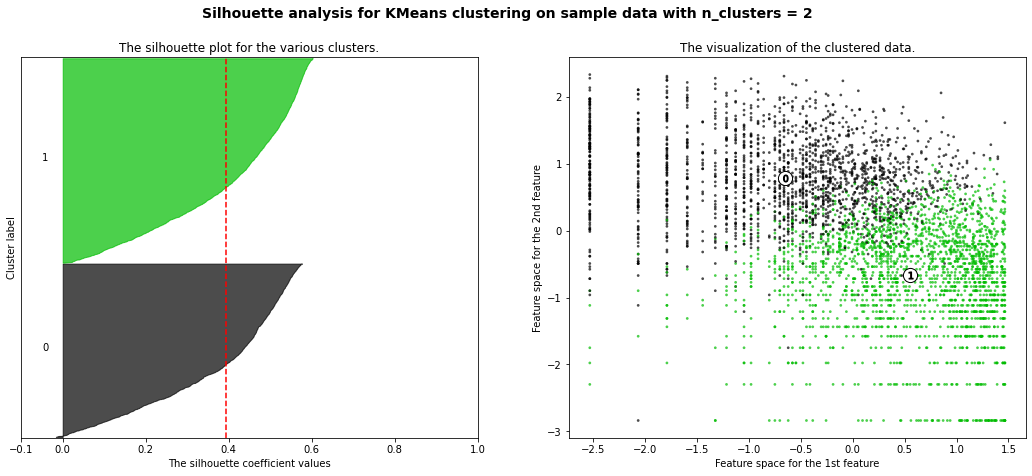

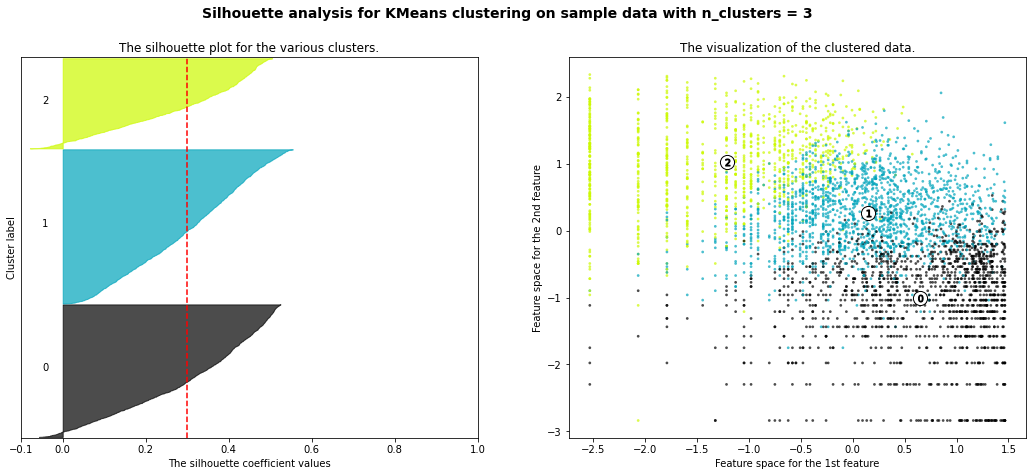

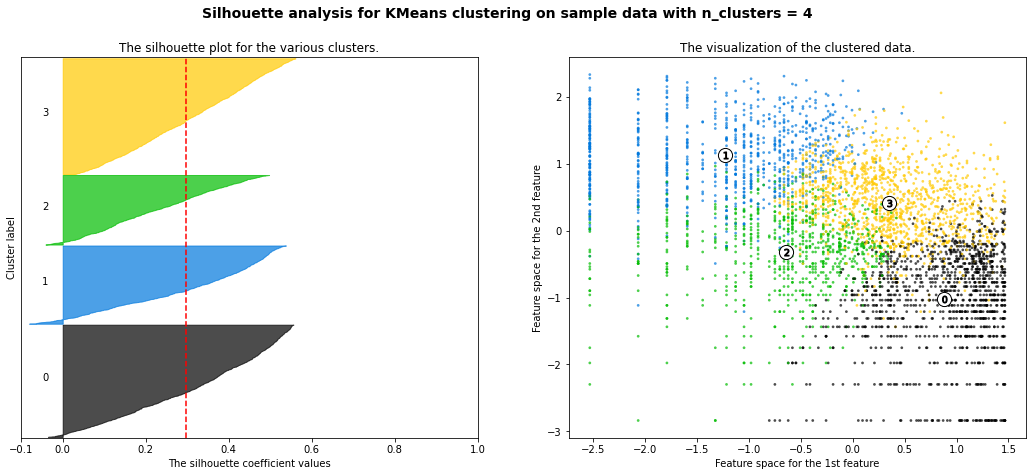

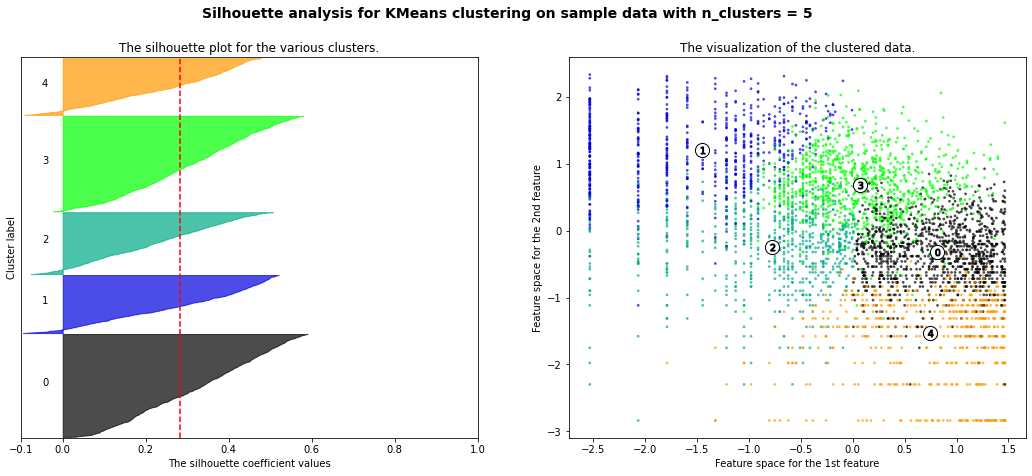

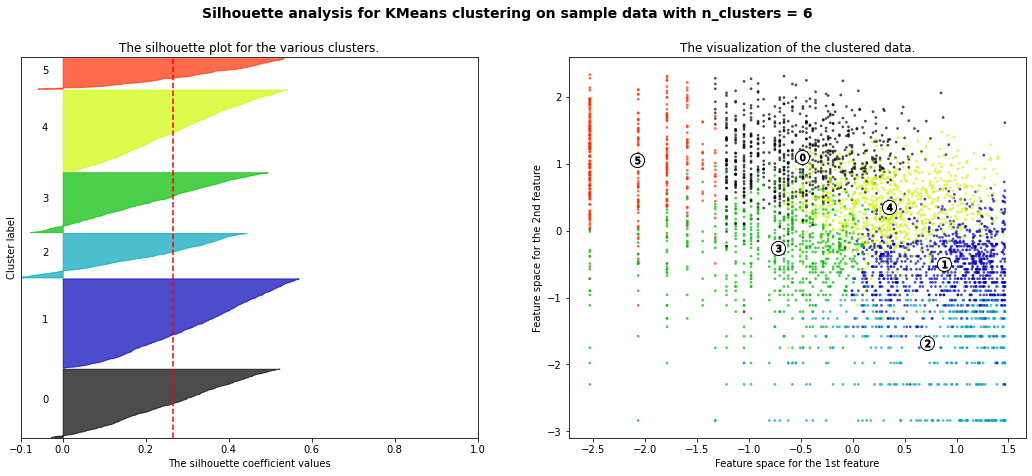

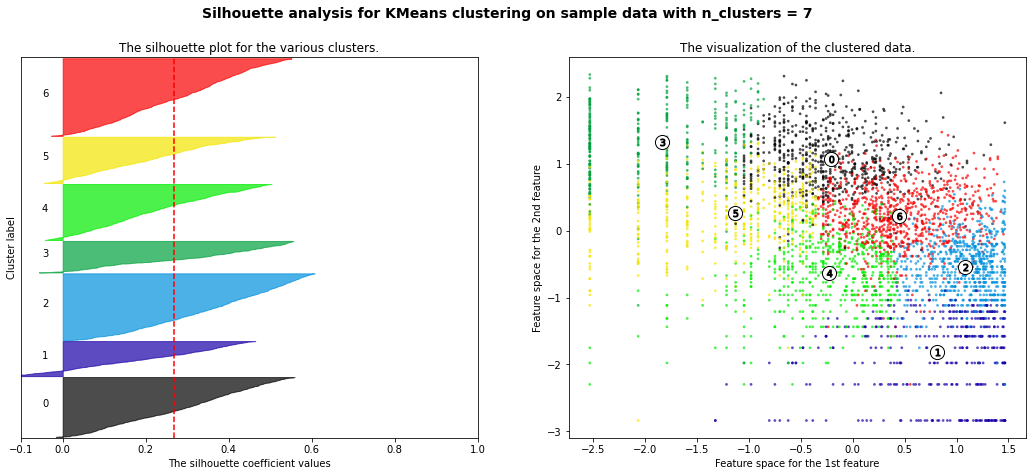

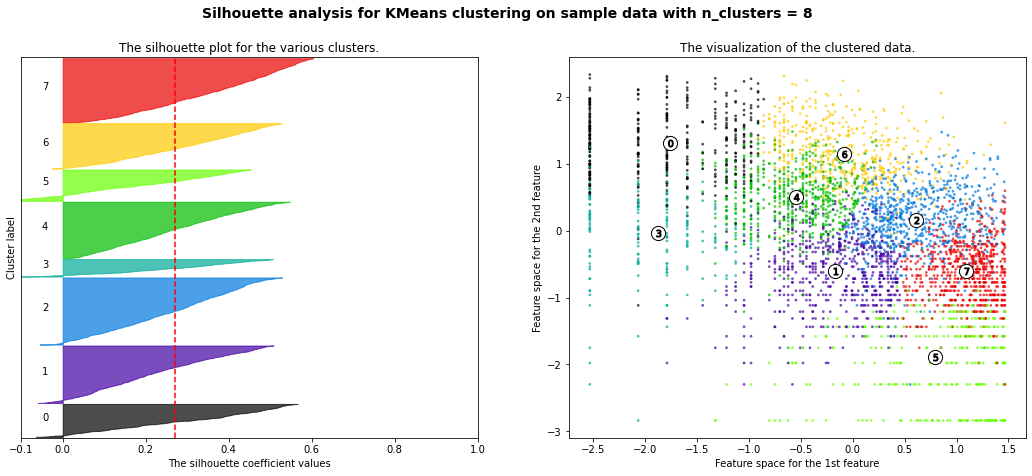

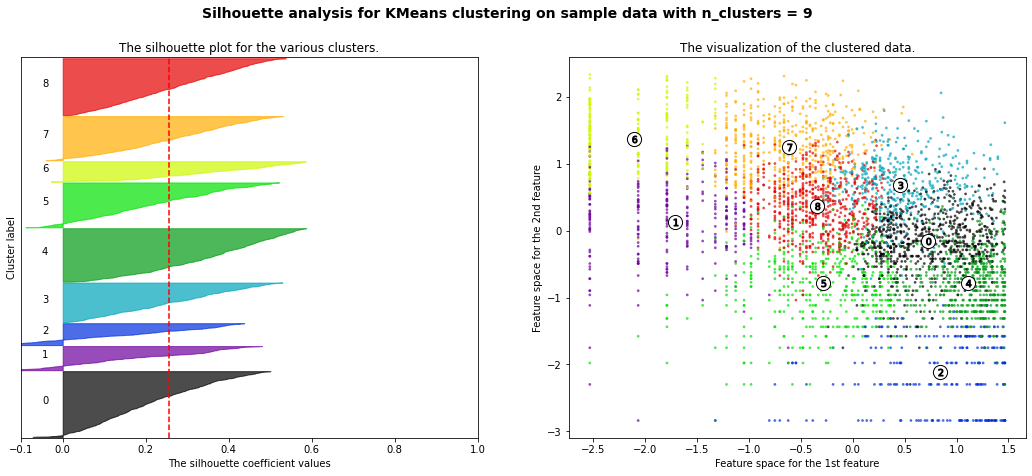

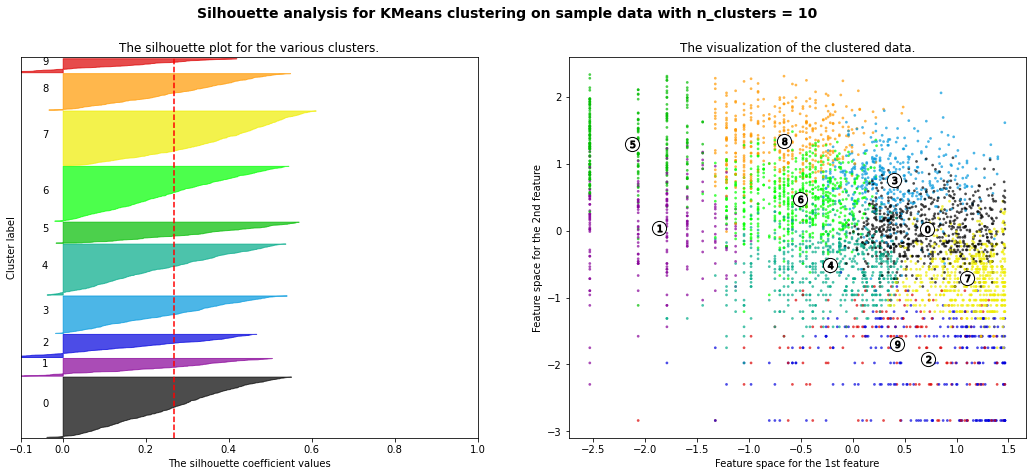

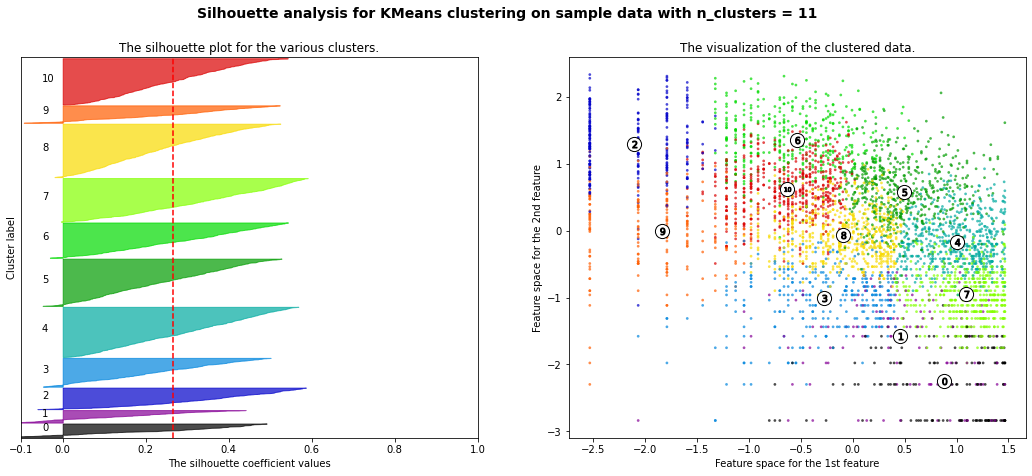

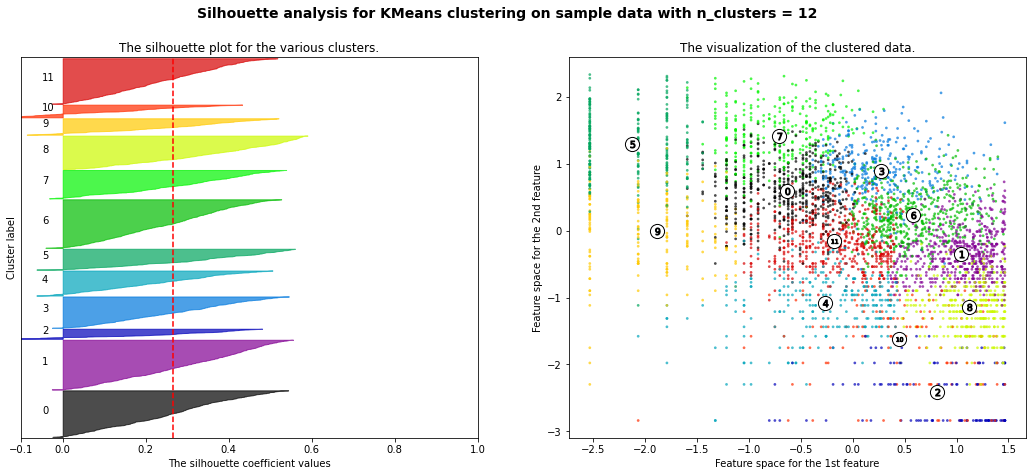

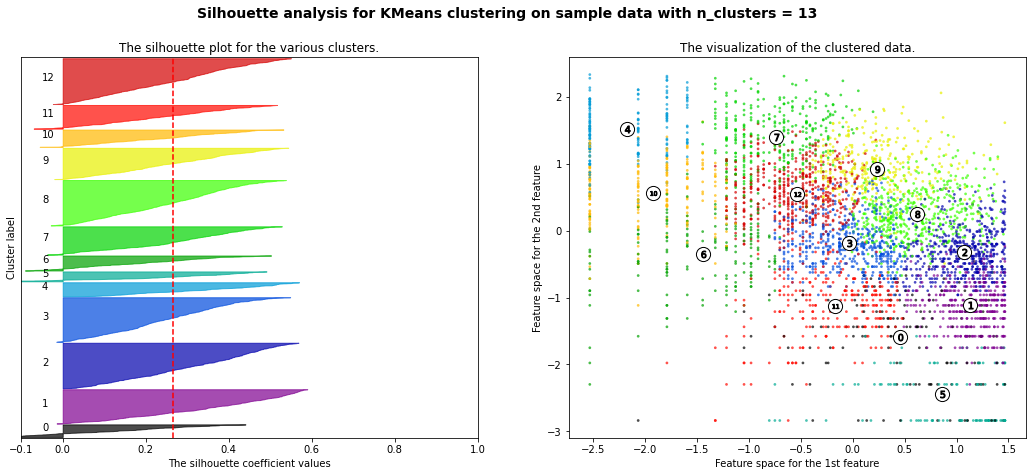

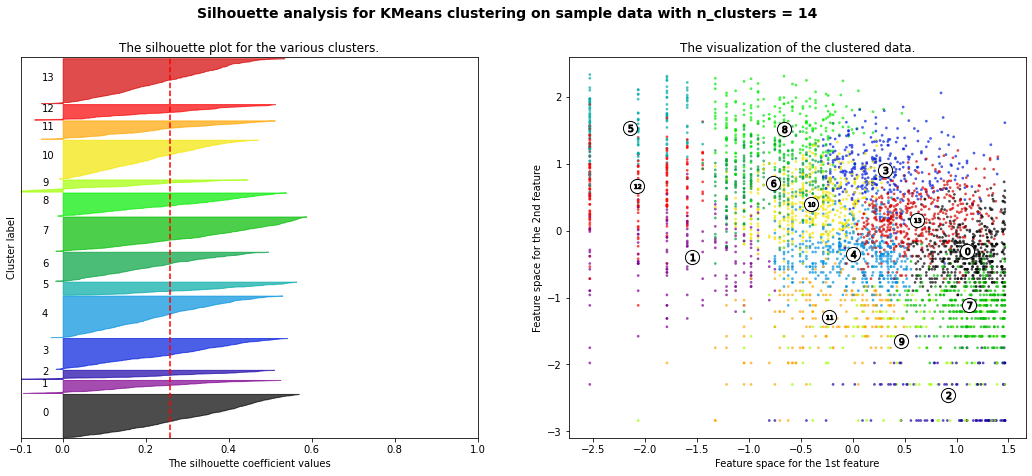

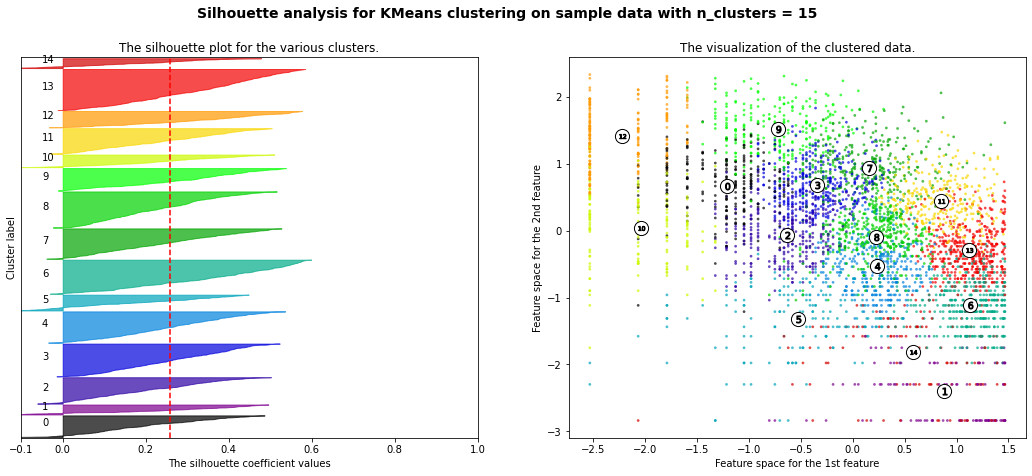

In [134]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_km)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rfm_km, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_km, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(rfm_km[:, 0], rfm_km[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Summary

In [135]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with Elbow method  ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow method  ", "FM", "2"])
myTable.add_row(['3',"K-Means with Elbow method  ", "RFM", "2"])


myTable.add_row(['4',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['5',"DBSCAN ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "RFM", "3"])

myTable.add_row(['7',"Hierarchical clustering  ", "RFM", "2"])
print(myTable)

+--------+-----------------------------+------+---------------------------+
| SL No. |          Model_Name         | Data | Optimal_Number_of_cluster |
+--------+-----------------------------+------+---------------------------+
|   1    | K-Means with Elbow method   |  RM  |             2             |
|   2    | K-Means with Elbow method   |  FM  |             2             |
|   3    | K-Means with Elbow method   | RFM  |             2             |
|   4    |           DBSCAN            |  RM  |             2             |
|   5    |           DBSCAN            |  FM  |             2             |
|   6    |           DBSCAN            | RFM  |             3             |
|   7    |  Hierarchical clustering    | RFM  |             2             |
+--------+-----------------------------+------+---------------------------+


### Conclusion:

Descriptive Analysis

The data exploration of Online customer segmentation dataset shows :

Missing and duplicate values were found.

Most of the purchases are from the United Kingdom.

Most of the customers have purchased items on Thursday, Wednesday, Tuesday.

Most of the customers have purchased items in November, October, December, and the least number of purchases in April, January, February.

Most of the customers purchase in the afternoon time. The 12th hour of the day is a peak for purchasing items.

We investigated the dataset, checked null values, duplicate values. Then getting Dataset ready for exploratory data analysis. Then we did some feature engineering, we extracted the DateTime column for getting some more useful columns. We also created the Total amount as a new variable. Thus we prepared our data for models. After that, we created an RFM model (Recency, Frequency, Monetary value). We did a log transformation of R, F, M for better results.

Now comes the model-building part, we used the K-Means clustering algorithm to find the optimal number of clusters that can separate customers based on their purchasing behavior. We then applied the K-Means algorithm with the Silhouette Score Method on RM, FM, RFM simultaneously. Where we got the optimal number of clusters = 2. We then visualized our results with scatterplots. Then moving forward we applied K-Means with Elbow Method on RM, FM, RFM simultaneously. Next, we applied DBSCAN on RM, FM, and RFM where we got the optimal number of clusters as 2, 2, 3 simultaneously. After that, we applied Dendrogram to find the optimal number of clusters..

**So, by applying various algorithms, optimal number of cluster is equal to 2.**